#                      Predicting Dengue Fever Outbreaks in Sri Lanka

Mir Tahmid

mirtahmid@gmail.com

# Data Overview

The dataset contains 22,950 entries and 19 columns. The columns cover various weather-related metrics, along with dengue case counts, district names, and dates. Here's a summary of the key aspects:

**Date Columns:** Week_Start_Date, Week_End_Date (currently as strings).

**Weather Data:** Temperature, precipitation, wind speed, daylight duration, etc.

**Dengue Case Data:** Number_of_Cases.

**District Information:** District.

The dataset has **no missing values,** and the date columns have been successfully converted to datetime format. Additional time-related features, such as **Weekday_Start, Weekday_End, and Day_of_Year,** have been extracted.

Next, we'll proceed with the following steps:

Univariate Analysis: Analyze the distribution of individual features.

Bivariate Analysis: Explore relationships between pairs of features.

Multivariate Analysis: Explore relationsips between multiple features.

# Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Load Dataset and Inspect the Dataset

In [16]:
# --- Importing Dataset ---
from google.colab import files
files.upload()
# --- Reading Dataset ---
df = pd.read_csv('Final Sri_lanka_dengue_cases_weather_weekly_2007_2024.csv')

Saving Final Sri_lanka_dengue_cases_weather_weekly_2007_2024.csv to Final Sri_lanka_dengue_cases_weather_weekly_2007_2024 (1).csv


In [17]:
# Load the dataset
#df = pd.read_csv('/kaggle/input/final-sri-lanka-dengue-cases-weather-weekly-07-24/Final Sri_lanka_dengue_cases_weather_weekly_2007_2024.csv')

# Display basic information
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22900 entries, 0 to 22899
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District                       22900 non-null  object 
 1   Number_of_Cases                22900 non-null  int64  
 2   Week_Start_Date                22900 non-null  object 
 3   Month                          22900 non-null  int64  
 4   Year                           22900 non-null  int64  
 5   Week                           22900 non-null  int64  
 6   Week_End_Date                  22900 non-null  object 
 7   Avg Max Temp (°C)              22900 non-null  float64
 8   Avg Min Temp (°C)              22900 non-null  float64
 9   Avg Apparent Max Temp (°C)     22900 non-null  float64
 10  Avg Apparent Min Temp (°C)     22900 non-null  float64
 11  Total Precipitation (mm)       22900 non-null  float64
 12  Total Rain (mm)                22900 non-null 

Number_of_Cases         Month          Year          Week  \
count     22900.000000  22900.000000  22900.000000  22900.000000   
mean         34.739607      6.437773   2015.276201     26.222707   
std          87.523903      3.444179      5.073494     15.033863   
min           0.000000      1.000000   2007.000000      1.000000   
25%           2.000000      3.000000   2011.000000     13.000000   
50%           9.000000      6.000000   2015.000000     26.000000   
75%          31.000000      9.000000   2020.000000     39.000000   
max        2631.000000     12.000000   2024.000000     53.000000   

       Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Apparent Max Temp (°C)  \
count       22900.000000       22900.000000                22900.000000   
mean           29.604291          23.525223                   33.941691   
std             3.029898           2.765298                    3.733032   
min            15.600000           7.212500                   13.487500   
25%            28.150000          22.450000                   32.300000   
50%            29.425000          24.025000                   34.125000   
75%            31.412500          25.287500                   36.287500   
max            38.612500          29.262500                   44.337500   

       Avg Apparent Min Temp (°C)  Total Precipitation (mm)  Total Rain (mm)  \
count                22900.000000              22900.000000     22900.000000   
mean                    26.903960                 42.016476        42.016476   
std                      3.588574                 49.655981        49.655981   
min                      4.712500                  0.000000         0.000000   
25%                     25.700000                  7.300000         7.300000   
50%                     27.787500                 24.800000        24.800000   
75%                     29.075000                 59.700000        59.700000   
max                     33.850000                599.000000       599.000000   

       Avg Wind Speed (km/h)  Max Wind Gusts (km/h)  Weather Code  \
count           22900.000000           22900.000000  22900.000000   
mean               16.893420              45.623655     43.264760   
std                 6.180999              12.060575     23.276299   
min                 3.587500              20.900000      0.000000   
25%                12.325000              36.400000     51.000000   
50%                16.025000              43.600000     51.000000   
75%                20.400000              52.900000     61.000000   
max                42.087500             114.100000     65.000000   

       Avg Daylight Duration (hours)  Avg Sunrise Time  Avg Sunset Time  
count                   22900.000000      22900.000000     22900.000000  
mean                       12.126821        363.122402      1090.746725  
std                         0.308234         12.009171        13.634046  
min                        11.558333        344.000000      1061.000000  
25%                        11.835417        354.000000      1080.000000  
50%                        12.129167        359.000000      1095.000000  
75%                        12.418750        372.000000      1100.000000  
max                        12.687500        391.000000      1114.000000

# Preprocessing

**▴Convert date columns to datetime.**

**▴Handle missing values.**

**▴Extract additional time features.**

In [18]:
# Convert date columns to datetime format
df['Week_Start_Date'] = pd.to_datetime(df['Week_Start_Date'])
df['Week_End_Date'] = pd.to_datetime(df['Week_End_Date'])

# Check for missing values and fill/handle them as needed
df.fillna(method='ffill', inplace=True)

# Feature engineering: extract time-based features
df['Year'] = df['Week_Start_Date'].dt.year
df['Month'] = df['Week_Start_Date'].dt.month
df['Week'] = df['Week_Start_Date'].dt.isocalendar().week

# Descriptive Statistics

Generate summary statistics to understand the central tendency, dispersion, and shape of the dataset's distribution.

In [19]:
# Summary statistics for the dataset
summary_stats = df.describe().T
print(summary_stats)

                                 count                 mean  \
Number_of_Cases                22900.0            34.739607   
Week_Start_Date                  22900  2015-10-08 12:00:00   
Month                          22900.0             6.437773   
Year                           22900.0          2015.276201   
Week                           22900.0            26.222707   
Week_End_Date                    22900  2015-10-15 12:00:00   
Avg Max Temp (°C)              22900.0            29.604291   
Avg Min Temp (°C)              22900.0            23.525223   
Avg Apparent Max Temp (°C)     22900.0            33.941691   
Avg Apparent Min Temp (°C)     22900.0             26.90396   
Total Precipitation (mm)       22900.0            42.016476   
Total Rain (mm)                22900.0            42.016476   
Avg Wind Speed (km/h)          22900.0             16.89342   
Max Wind Gusts (km/h)          22900.0            45.623655   
Weather Code                   22900.0             43.2

# Feature Engineering

**Create lag features and rolling averages.**

In [20]:
# Create lag features for dengue cases
df['Cases_Lag_1'] = df['Number_of_Cases'].shift(1)
df['Cases_Lag_2'] = df['Number_of_Cases'].shift(2)

# Rolling averages
df['Cases_Rolling_Mean'] = df['Number_of_Cases'].rolling(window=4).mean()

**Lag Feature (lag_1)**

This feature represents the number of dengue cases in the previous week (i.e., a one-week lag). For future weeks, once the model makes a prediction for the current week, that predicted value is used as the lag_1 value for the next week.

Example: If the model predicts 50 cases for the first future week, that predicted value (50) will be used as the lag_1 feature for predicting the second future week.

**Rolling Mean (rolling_mean_3)**

This feature is a 3-week rolling average of dengue cases. For future weeks, once the model makes a prediction, the rolling average is updated using the predicted cases from the most recent weeks. Example: If the model predicts 50 cases for week 1, 60 cases for week 2, and 55 cases for week 3, the rolling_mean_3 for week 4 will be the average of these three predictions: (50 + 60 + 55) / 3.

# Z-Score Method: Remove Outliers

In [21]:
import numpy as np
from scipy import stats
import pandas as pd

# Ensure numerical_columns is defined
numerical_columns = ['Number_of_Cases', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)',
                     'Avg Apparent Max Temp (°C)', 'Avg Apparent Min Temp (°C)',
                     'Total Precipitation (mm)', 'Total Rain (mm)', 'Avg Wind Speed (km/h)',
                     'Max Wind Gusts (km/h)', 'Avg Daylight Duration (hours)']

# Detect outliers using Z-Score
z_scores = stats.zscore(df[numerical_columns])
z_scores_df = pd.DataFrame(z_scores, columns=numerical_columns)

# Identify rows without outliers (Z-Score between -3 and 3)
data_no_outliers_zscore = df[(abs(z_scores_df) <= 3).all(axis=1)]

print(f"Number of rows after removing Z-Score outliers: {len(data_no_outliers_zscore)}")

Number of rows after removing Z-Score outliers: 21087


Note:

Imports: The required libraries numpy, scipy.stats, and pandas are imported. These libraries are used for numerical computations, statistical functions, and data manipulation, respectively.

Numerical Columns: A list of numerical_columns is defined, containing the names of columns from the dataset that represent numerical features. These columns will be checked for outliers.

Z-Score Calculation: The Z-Score is calculated for the numerical columns of the dataframe df. The Z-Score measures how many standard deviations each data point is from the mean of its respective column. The function stats.zscore() from the scipy library is used to compute the Z-Scores for all rows in the dataset.

Outlier Detection: A new dataframe z_scores_df is created, storing the Z-Scores for each numerical column. Rows with Z-Scores between -3 and 3 (inclusive) are considered to be within a normal range, while those outside this range are considered outliers.

Remove Outliers: Using the condition abs(z_scores_df) <= 3, the code filters out rows where all numerical column values have Z-Scores within the range [-3, 3]. The resulting dataframe, data_no_outliers_zscore, contains only rows without outliers.

Output: Finally, the number of rows remaining in the dataset after removing outliers is printed.

# IQR Method: Remove Outliers

In [22]:
# Ensure numerical_columns is defined
numerical_columns = ['Number_of_Cases', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)',
                     'Avg Apparent Max Temp (°C)', 'Avg Apparent Min Temp (°C)',
                     'Total Precipitation (mm)', 'Total Rain (mm)', 'Avg Wind Speed (km/h)',
                     'Max Wind Gusts (km/h)', 'Avg Daylight Duration (hours)']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify rows without outliers (IQR method)
data_no_outliers_iqr = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) |
                              (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Number of rows after removing IQR outliers: {len(data_no_outliers_iqr)}")

Number of rows after removing IQR outliers: 17584


Note:

Numerical Columns: A list of numerical columns (numerical_columns) is defined, specifying which columns in the dataset to check for outliers.

IQR Calculation: The first quartile (Q1, 25th percentile) and third quartile (Q3, 75th percentile) are calculated for the specified numerical columns. The IQR is the range between Q3 and Q1.

Outlier Detection: The code identifies outliers by checking whether values fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. Rows with values outside this range in any of the numerical columns are considered outliers.

Remove Outliers: Rows without outliers are retained in data_no_outliers_iqr.

Output: The number of rows remaining after removing outliers is printed.

# Scatter Plot Visualization

To visualize outliers in the context of relationships between variables, you can use scatter plots. Below is an example of how to do this for Number_of_Cases versus Avg Max Temp (°C)

**Scatter Plot: Points are colored based on whether they are identified as outliers using the Z-Score method.**

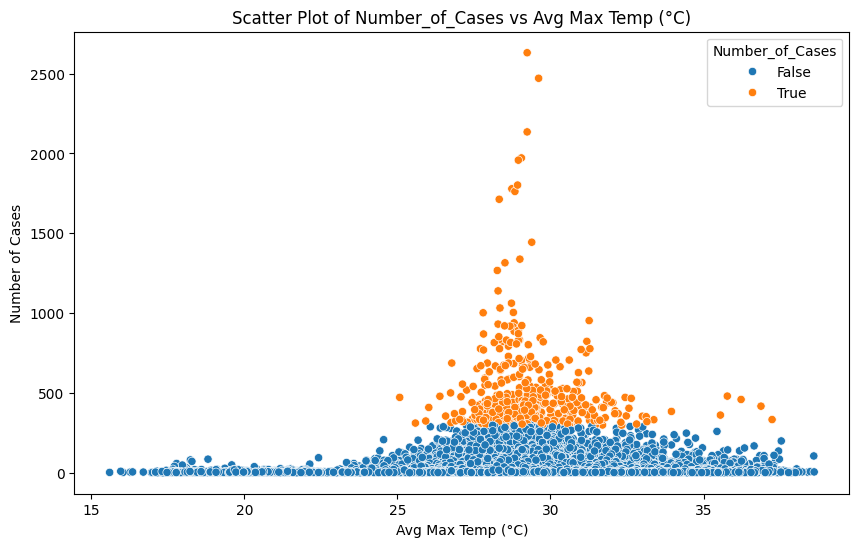

In [23]:
plt.figure(figsize=(10, 6))

# Scatter plot for Number_of_Cases vs Avg Max Temp (°C)
sns.scatterplot(x=df['Avg Max Temp (°C)'], y=df['Number_of_Cases'], hue=(abs(z_scores_df['Number_of_Cases']) > 3))

plt.title('Scatter Plot of Number_of_Cases vs Avg Max Temp (°C)')
plt.xlabel('Avg Max Temp (°C)')
plt.ylabel('Number of Cases')
plt.show()

# Univariate Analysis

Text(0.5, 1.0, 'Distribution of Dengue Cases')

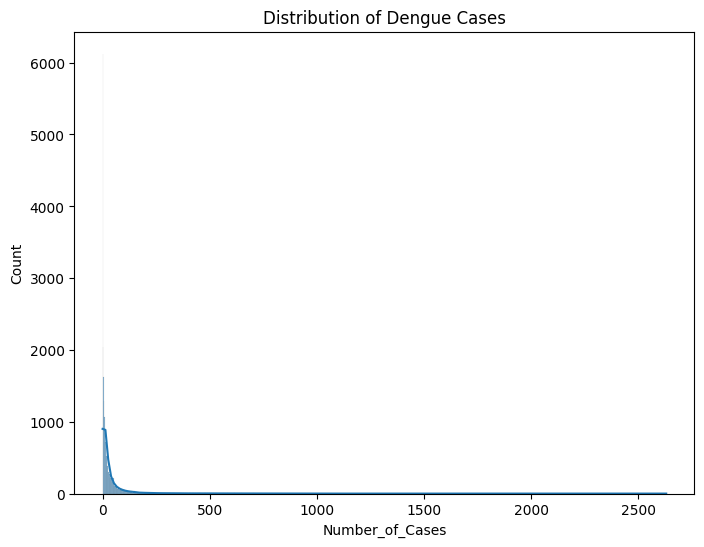

In [24]:
# Univariate analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['Number_of_Cases'], kde=True)
plt.title('Distribution of Dengue Cases')

The plt.figure(figsize=(8, 6)) sets the size of the plot to 8 inches by 6 inches, ensuring the visualization has adequate space.

Histogram with KDE: sns.histplot() from Seaborn is used to plot the distribution of the Number_of_Cases column. The kde=True parameter adds a kernel density estimate (a smooth curve) over the histogram, helping to visualize the probability density function of the data.

Title: The plot is titled 'Distribution of Dengue Cases' to describe the data being analyzed.

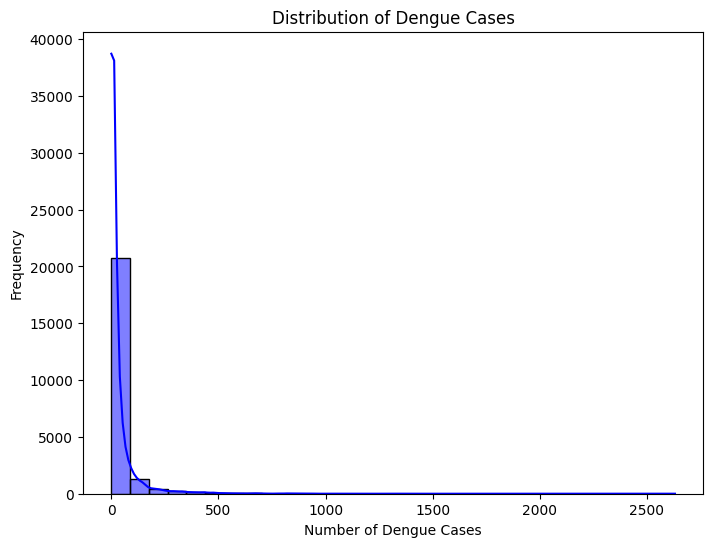

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram: Distribution of Dengue Cases
plt.figure(figsize=(8, 6))
sns.histplot(df['Number_of_Cases'], bins=30, kde=True, color='blue')
plt.title('Distribution of Dengue Cases')
plt.xlabel('Number of Dengue Cases')
plt.ylabel('Frequency')
plt.show()

# Box Plot

Box plots display the distribution of a continuous variable, highlighting the median, quartiles, and potential outliers.

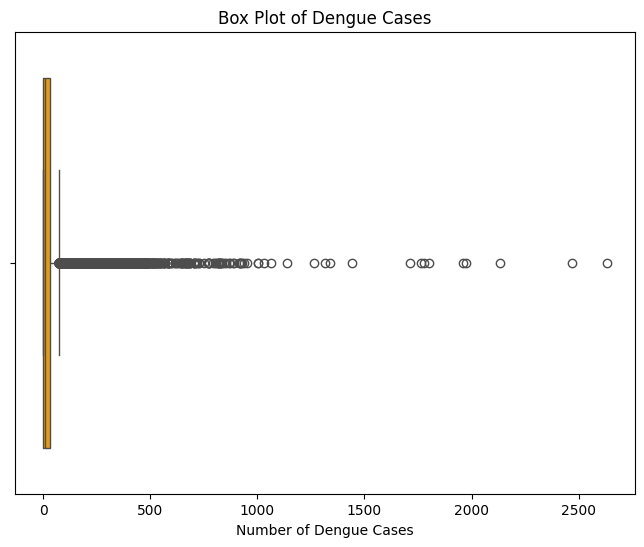

In [26]:
# Box plot: Distribution of Dengue Cases
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Number_of_Cases'], color='orange')
plt.title('Box Plot of Dengue Cases')
plt.xlabel('Number of Dengue Cases')
plt.show()

Identifying Outliers: A box plot highlights outliers, which are values that deviate significantly from the majority of the data. This can help you understand if certain weeks had unusually high or low dengue cases.

# Kernel Density Estimate (KDE)

A KDE plot estimates the probability density function of a continuous variable.

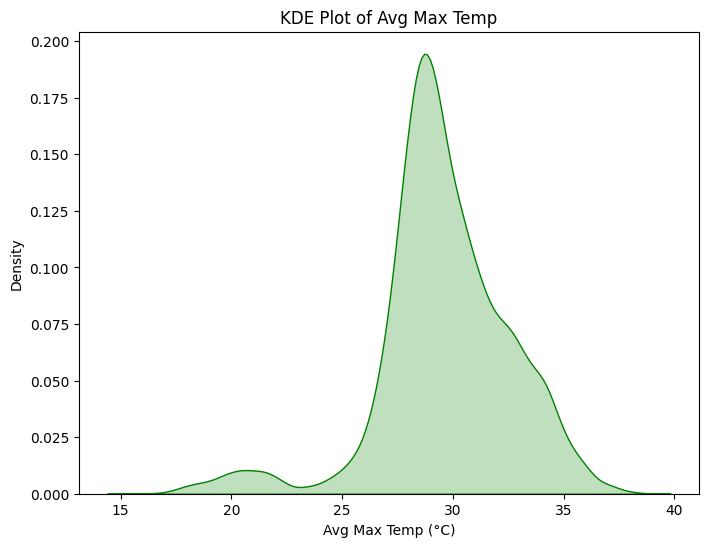

In [27]:
# KDE plot: Distribution of Average Max Temperature
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Avg Max Temp (°C)'], shade=True, color='green')
plt.title('KDE Plot of Avg Max Temp')
plt.xlabel('Avg Max Temp (°C)')
plt.show()

Visualizing Density: The shaded area under the curve represents the density (or probability) of temperature values occurring within the dataset. It provides an intuitive visual of where data points are concentrated.

# Bar Plot for Categorical Variables

Bar plots are useful for visualizing the frequency or proportion of categories in a categorical variable.

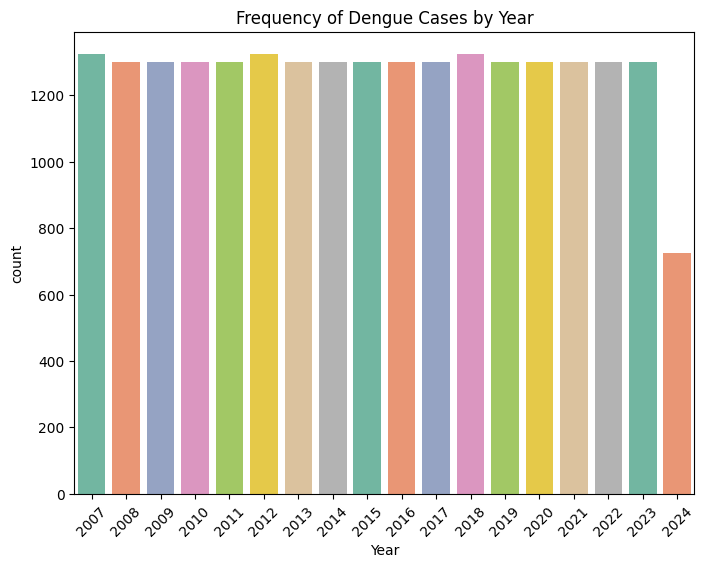

In [28]:
# Bar plot: Frequency of Dengue Cases by Year
plt.figure(figsize=(8, 6))
sns.countplot(x='Year', data=df, palette='Set2')
plt.title('Frequency of Dengue Cases by Year')
plt.xticks(rotation=45)
plt.show()

# Pie Chart

A pie chart shows the proportion of different categories in a categorical variable.

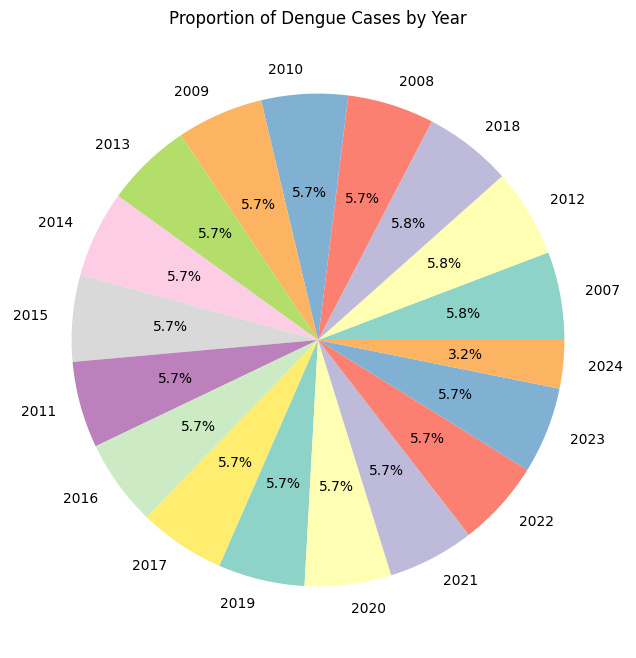

In [29]:
# Pie chart: Proportion of Dengue Cases by Year
plt.figure(figsize=(8, 8))
df['Year'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Proportion of Dengue Cases by Year')
plt.ylabel('')  # Removes the y-label
plt.show()

# Violin Plot

A violin plot is similar to a box plot but also includes a KDE to show the distribution shape.

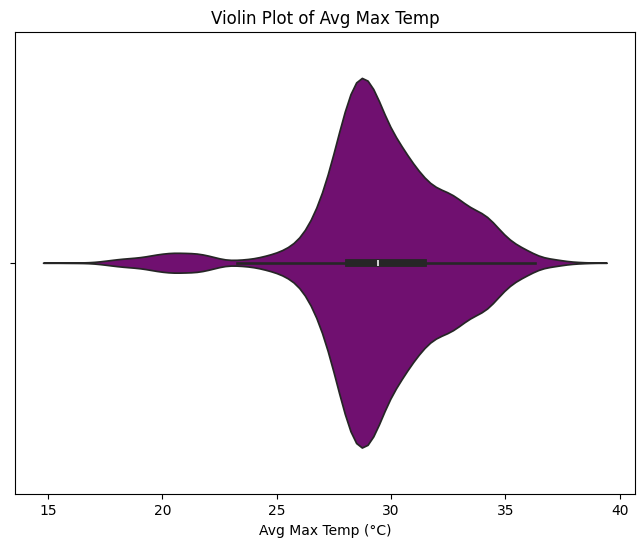

In [30]:
# Violin plot: Distribution of Avg Max Temp
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Avg Max Temp (°C)'], color='purple')
plt.title('Violin Plot of Avg Max Temp')
plt.xlabel('Avg Max Temp (°C)')
plt.show()

# QQ Plot

A QQ plot compares the distribution of a variable to a normal distribution.

**QQ Plot:** Assesses how closely a variable follows a normal distribution.

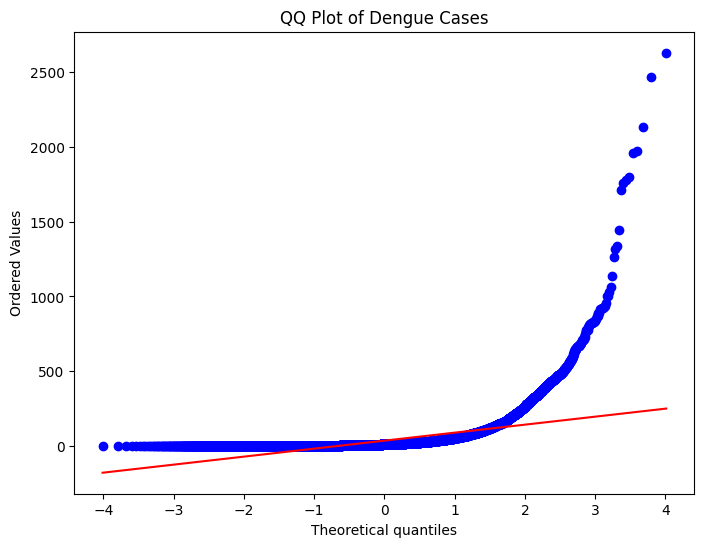

In [31]:
import scipy.stats as stats

# QQ plot: Number of Dengue Cases
plt.figure(figsize=(8, 6))
stats.probplot(df['Number_of_Cases'], dist="norm", plot=plt)
plt.title('QQ Plot of Dengue Cases')
plt.show()

# Bivariate Analysis

Text(0.5, 1.0, 'Dengue Cases vs Avg Max Temp')

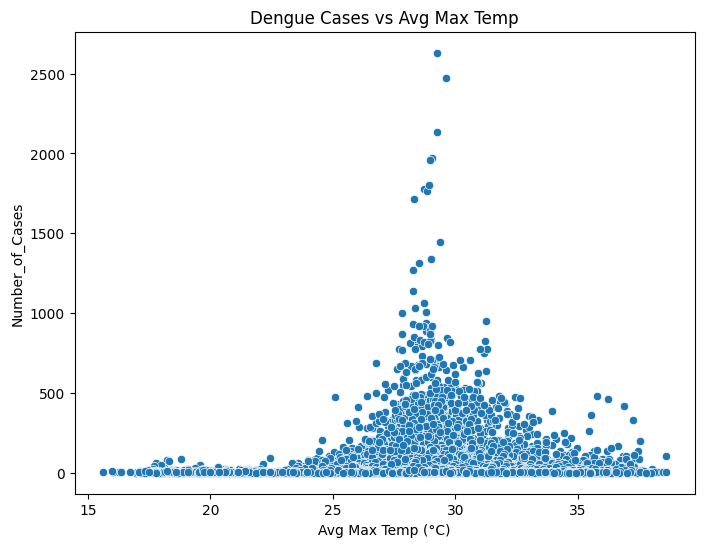

In [32]:
# Bivariate analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg Max Temp (°C)', y='Number_of_Cases', data=df)
plt.title('Dengue Cases vs Avg Max Temp')

Note:

The plot size is set to 8 inches by 6 inches using plt.figure(figsize=(8, 6)), providing enough space for the scatter plot.

Scatter Plot: sns.scatterplot() from Seaborn is used to visualize the relationship between the two variables. The x axis represents 'Avg Max Temp (°C)', and the y axis represents 'Number_of_Cases'. Each point in the scatter plot represents a single data observation.

Title: The plot is titled 'Dengue Cases vs Avg Max Temp' to indicate the variables being compared.

# Bivariate Analysis

**Focusing on relationships between dengue cases and selected weather variables:**

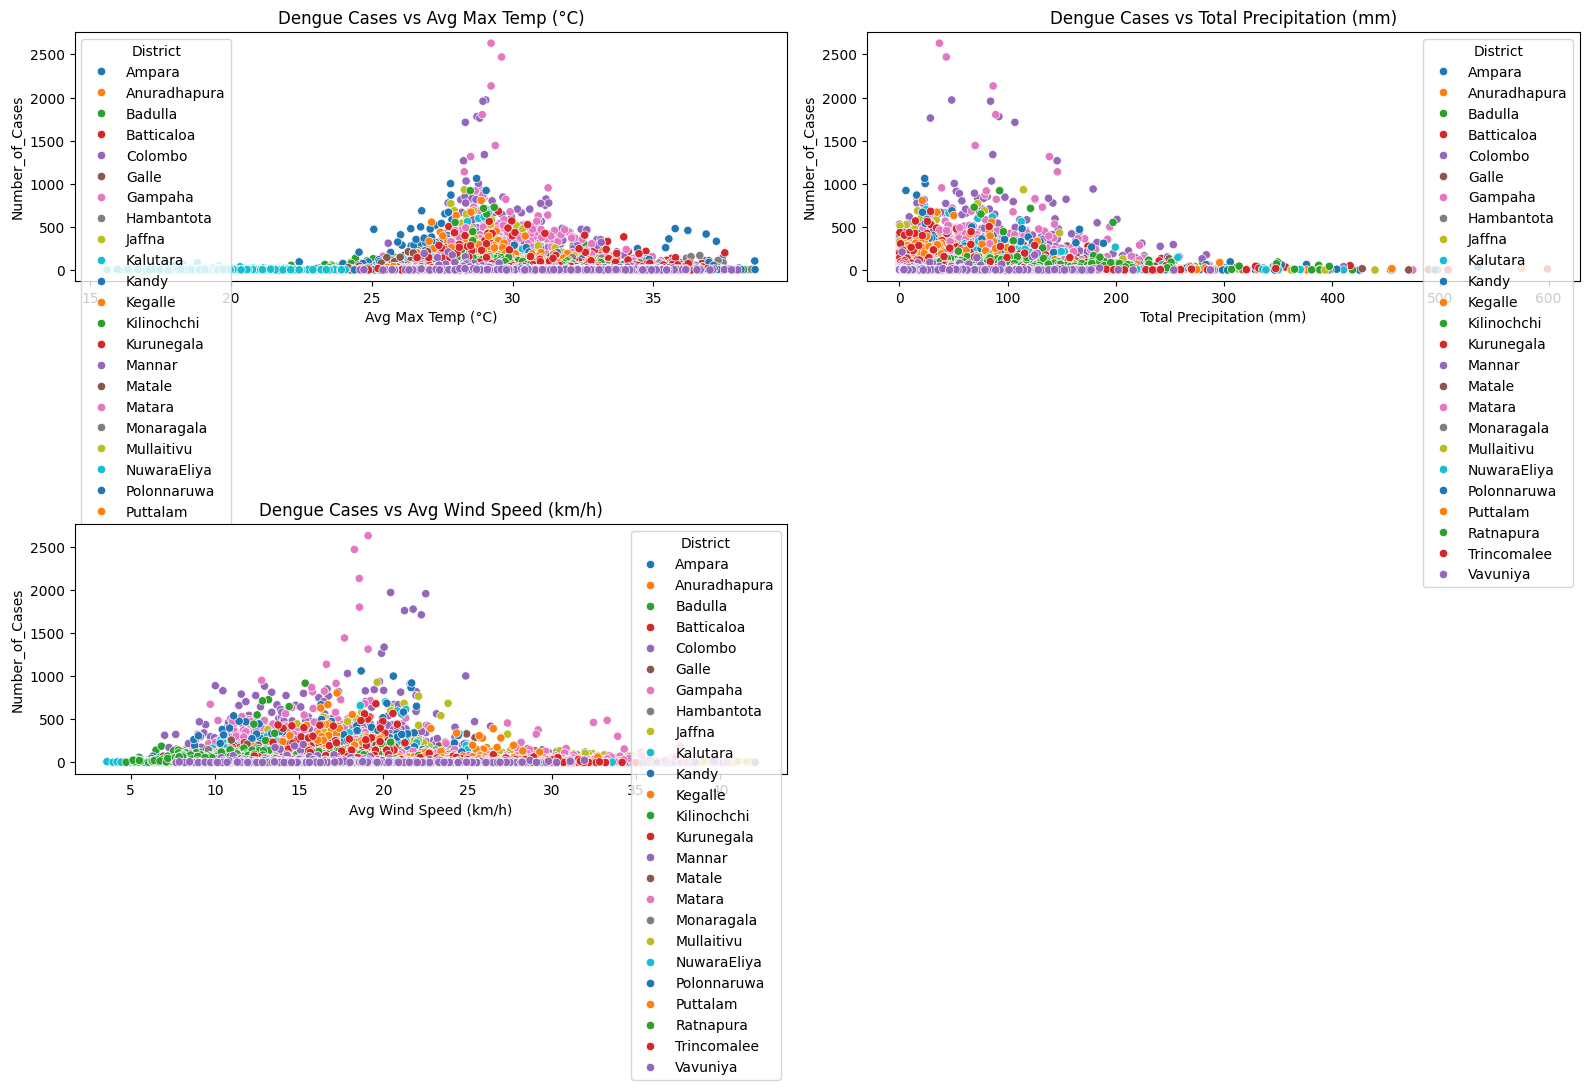

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))

# Scatter plot for Dengue Cases vs Avg Max Temp
plt.subplot(2, 2, 1)
sns.scatterplot(x='Avg Max Temp (°C)', y='Number_of_Cases', data=df, hue='District', palette='tab10')
plt.title('Dengue Cases vs Avg Max Temp (°C)')

# Scatter plot for Dengue Cases vs Total Precipitation
plt.subplot(2, 2, 2)
sns.scatterplot(x='Total Precipitation (mm)', y='Number_of_Cases', data=df, hue='District', palette='tab10')
plt.title('Dengue Cases vs Total Precipitation (mm)')

# Scatter plot for Dengue Cases vs Avg Wind Speed
plt.subplot(2, 2, 3)
sns.scatterplot(x='Avg Wind Speed (km/h)', y='Number_of_Cases', data=df, hue='District', palette='tab10')
plt.title('Dengue Cases vs Avg Wind Speed (km/h)')

plt.tight_layout()
plt.show()

# Scatter Plot

Scatter plots are useful for visualizing the relationship between two continuous variables.

Scatter Plot: Visualizes the relationship between two continuous variables (e.g., temperature and dengue cases).

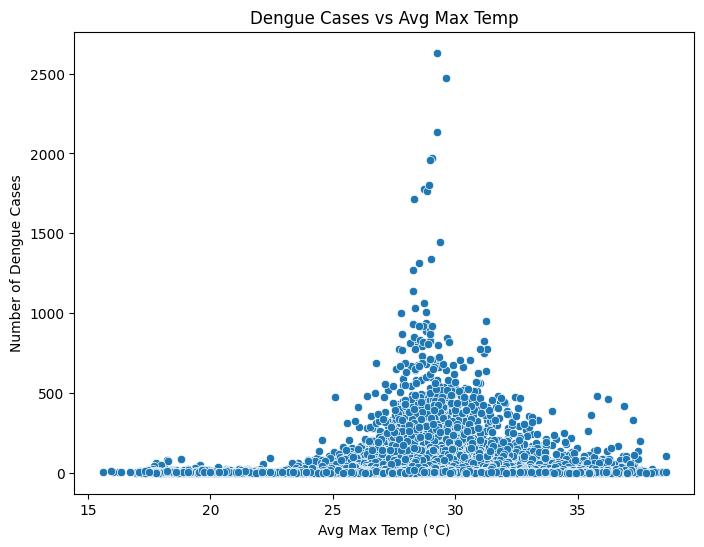

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Number of Dengue Cases vs Average Maximum Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg Max Temp (°C)', y='Number_of_Cases', data=df)
plt.title('Dengue Cases vs Avg Max Temp')
plt.xlabel('Avg Max Temp (°C)')
plt.ylabel('Number of Dengue Cases')
plt.show()

# Correlation Coefficient

The Pearson correlation coefficient measures the strength and direction of the linear relationship between two continuous variables.

Correlation Coefficient: Quantifies the strength of the relationship between two variables.

In [35]:
# Correlation between Avg Max Temp and Number of Cases
correlation = df['Avg Max Temp (°C)'].corr(df['Number_of_Cases'])
print(f"Correlation between Avg Max Temp and Dengue Cases: {correlation:.2f}")

Correlation between Avg Max Temp and Dengue Cases: -0.03


# Box Plot

Box plots are useful for comparing the distribution of a continuous variable across different categories of a categorical variable.

Box Plot: Compares the distribution of a continuous variable across categories (e.g., dengue cases by year).

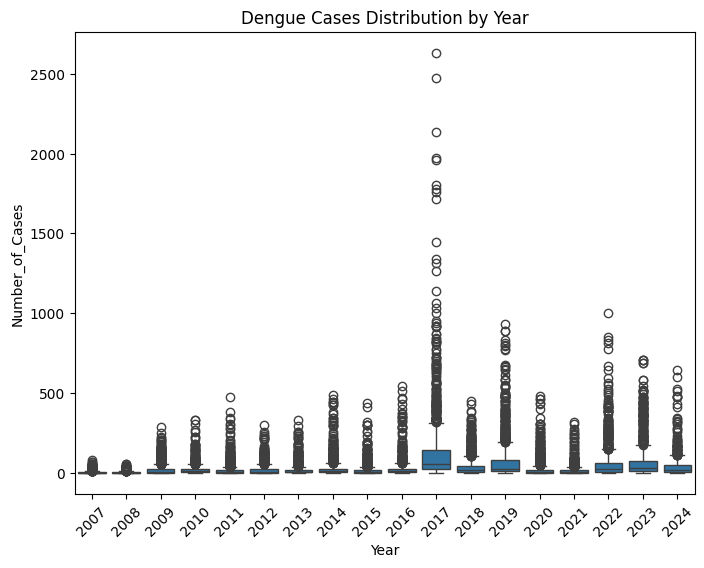

In [36]:
# Box plot: Number of Dengue Cases by Year
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Number_of_Cases', data=df)
plt.title('Dengue Cases Distribution by Year')
plt.xticks(rotation=45)
plt.show()

# Violin Plot

Violin plots combine the benefits of box plots and density plots, showing the distribution of the data across different categories.

Violin Plot: Provides a visual representation of the data distribution across categories.

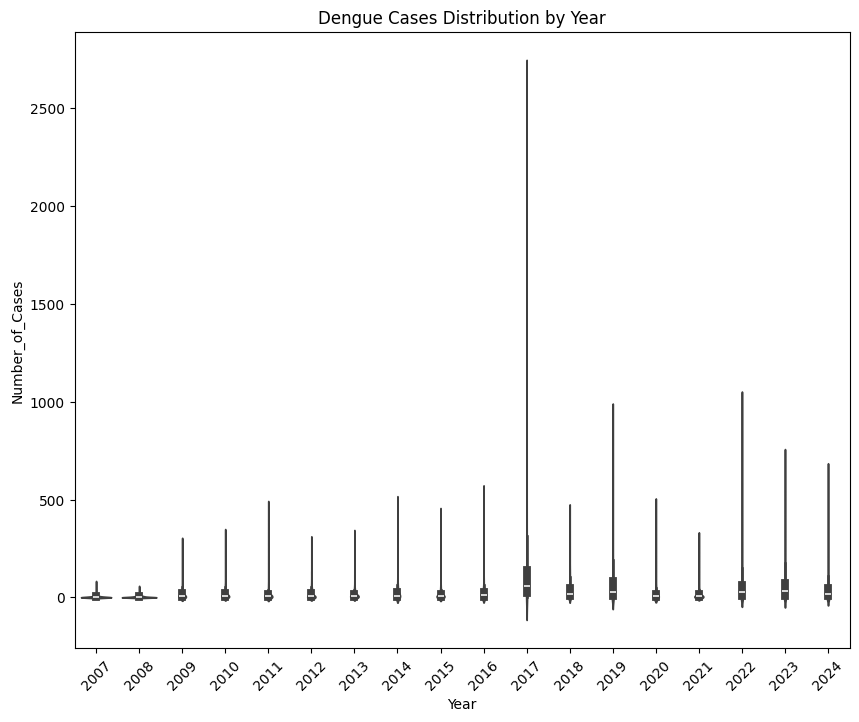

In [37]:
# Violin plot: Number of Dengue Cases by Year
plt.figure(figsize=(10, 8))
sns.violinplot(x='Year', y='Number_of_Cases', data=df)
plt.title('Dengue Cases Distribution by Year')
plt.xticks(rotation=45)
plt.show()

# Line Plot

Line plots are useful for visualizing trends over time, especially for time series data.

Line Plot: Shows trends over time based on weather data, useful for time series data

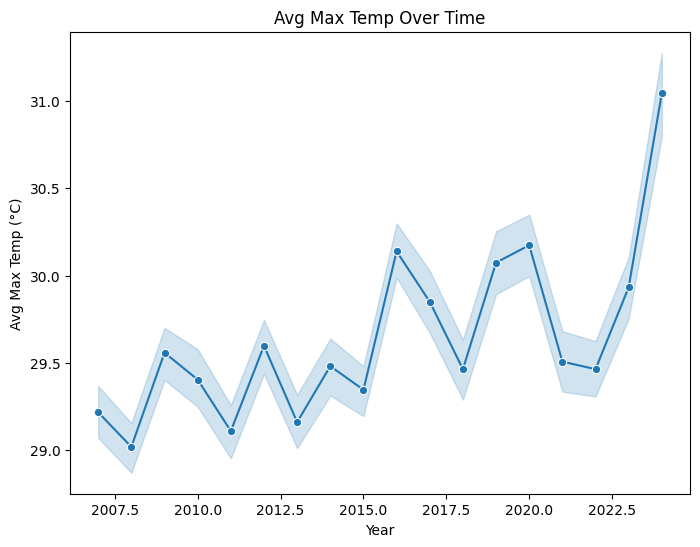

In [38]:
# Line plot: Average Maximum Temperature over Time
plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='Avg Max Temp (°C)', data=df, marker='o')
plt.title('Avg Max Temp Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Max Temp (°C)')
plt.show()

No outbreak of dengue fever in 2008, the maximum and minimum amount of outbreaks happened in the year of 2017 and 2007 respectively


# Bar Plot

Bar plots are useful for comparing the value of a categorical variable.

Bar Plot: Compares values across categories.

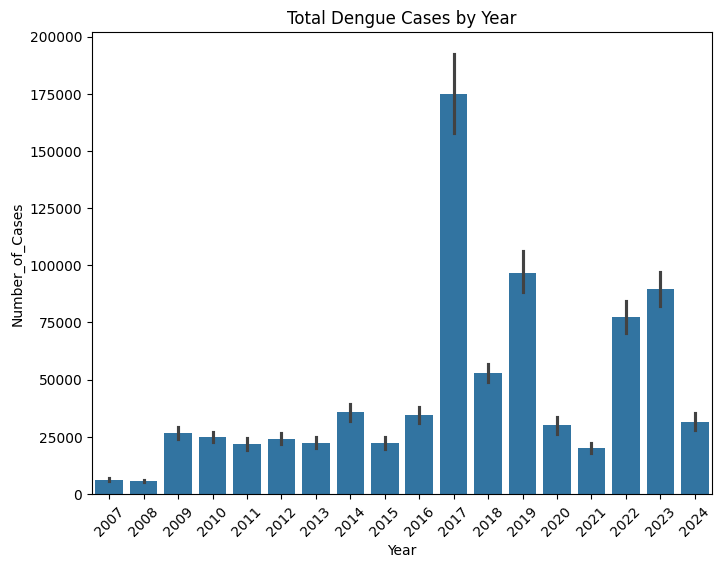

In [39]:
# Bar plot: Average Dengue Cases by Year
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Number_of_Cases', data=df, estimator=sum)
plt.title('Total Dengue Cases by Year')
plt.xticks(rotation=45)
plt.show()

It shows the number of dengue cases by year where in 2017 dengue cases got peak and 2007 and 2008 have the lowest number of cases.

# Multivariate analysis

To perform multivariate clustering analysis using K-Means and DBSCAN, you can follow these steps:

Data Preprocessing: Ensure the data is cleaned and scaled.

K-Means Clustering: Apply K-Means clustering and visualize the results.

DBSCAN Clustering: Apply DBSCAN clustering and visualize the results.

Comparing Results: Evaluate the performance and compare the results of both clustering methods.

# Data Preprocessing

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering
features = [
    'Number_of_Cases', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)',
    'Avg Apparent Max Temp (°C)', 'Avg Apparent Min Temp (°C)',
    'Total Precipitation (mm)', 'Total Rain (mm)', 'Avg Wind Speed (km/h)',
    'Max Wind Gusts (km/h)', 'Avg Daylight Duration (hours)'
]

# Data Preprocessing: Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features].dropna())

Note:

Feature Selection: A list of relevant features (features) is defined, which includes numerical columns that will be used for clustering. These features are selected from the dataset df.

Scaling: StandardScaler() from the sklearn.preprocessing module is used to scale the features. Standard scaling ensures that each feature has a mean of 0 and a standard deviation of 1. This is particularly useful for clustering algorithms like K-Means, which are sensitive to feature scaling.

Handling Missing Values: The dropna() function is used to remove any rows containing missing values in the selected columns before scaling, ensuring that only complete data is passed for scaling.

Transforming the Data: The fit_transform() method is applied to standardize the data in one step, both fitting the StandardScaler to the data and transforming the features into a scaled format, storing the result in scaled_features.

This process prepares the dataset for further analysis, particularly for clustering tasks.

# K-Means Clustering

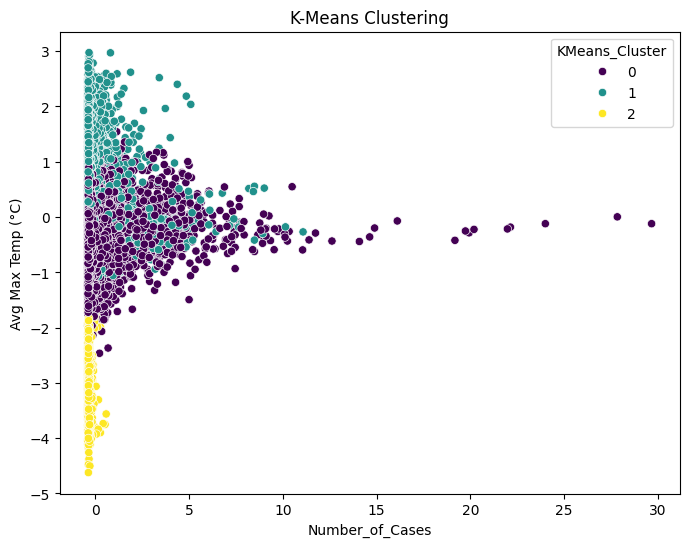

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

K-Means Clustering: The KMeans algorithm from sklearn.cluster is applied with 3 clusters (n_clusters=3) and a fixed random_state=42 to ensure reproducibility. The clustering algorithm assigns each data point to one of the 3 clusters.

Cluster Assignment: The cluster assignments generated by the K-Means algorithm are added to the original dataframe df in a new column called 'KMeans_Cluster'.

Scatter Plot: The sns.scatterplot() function from Seaborn is used to plot the first two scaled features on the x and y axes, representing Number_of_Cases and Avg Max Temp (°C) respectively.

The points are colored based on the cluster labels ('KMeans_Cluster'), with different clusters indicated by different colors using the 'viridis' color palette.

Plot Settings: The plot is titled 'K-Means Clustering', and the x and y axes are labeled with the respective feature names. The plot shows how data points are grouped into clusters based on the first two features.

This approach helps to visualize the clustering pattern and observe how the data points are grouped according to the K-Means algorithm.


**Findings**

Cluster 1: Districts with high temperatures and low dengue cases, possibly indicating a non-optimal environment for mosquito breeding.

Cluster 2: Districts with moderate temperatures and high dengue cases, possibly indicating ideal conditions for mosquito activity and viral transmission.

Cluster 3: Districts with low temperatures and low dengue cases, where environmental factors may not favor mosquito survival or dengue transmission.

This clustering approach provides valuable insights for targeted interventions, resource allocation, and epidemiological understanding across different districts.

# DBSCAN Clustering

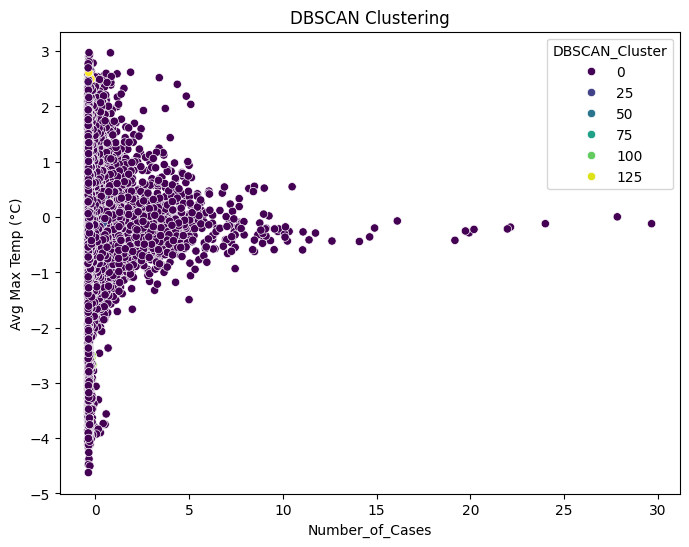

In [42]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

The DBSCAN algorithm from sklearn.cluster is applied with two key parameters

eps=0.5: The maximum distance between two samples for them to be considered as part of the same neighborhood.

min_samples=5: The minimum number of points required to form a dense region (i.e., a cluster).
The fit_predict() method assigns each data point to a cluster or labels it as noise (-1), and the results are stored in a new column 'DBSCAN_Cluster' in the dataframe df.

A scatter plot is generated using sns.scatterplot() to visualize the first two scaled features (scaled_features[:, 0] and scaled_features[:, 1]), which correspond to 'Number_of_Cases' and 'Avg Max Temp (°C)'.

The points are colored based on the cluster assignments ('DBSCAN_Cluster'), where the 'viridis' palette is used to differentiate between clusters. Noise points (if any) are often labeled as -1 and displayed in a separate color.

Plot Settings: The plot is titled 'DBSCAN Clustering', and the x and y axes are labeled with the feature names ('Number_of_Cases' and 'Avg Max Temp (°C)').

DBSCAN is a density-based clustering algorithm, making it effective for identifying clusters of varying shapes and sizes while filtering out noise points that don't belong to any cluster.

Why is DBSCAN Useful Here?

Identifying High-Risk Districts: By using DBSCAN, districts with dense regions of dengue cases in specific temperature ranges can be identified, helping health officials focus on those areas.

Outlier Detection: Districts that behave very differently from the rest (e.g., unusually high or low dengue cases) will be marked as outliers (-1), allowing for further investigation into why those districts deviate from the norm.

Clustering in Complex, Non-Uniform Regions: In regions where the relationship between dengue cases and temperature is not uniform or varies widely, DBSCAN can effectively group similar districts together without being constrained by the assumption of similarly shaped clusters.

This makes DBSCAN a powerful tool for analyzing district-wise dengue cases and temperature when the data exhibits irregular patterns or contains noise.

# Comparing Results

Comparing the clustering results by evaluating the number of clusters, silhouette scores.

**Silhouette Score:** This metric helps you understand the quality of clustering.

In [43]:
from sklearn.metrics import silhouette_score

# Silhouette score for K-Means
kmeans_silhouette = silhouette_score(scaled_features, df['KMeans_Cluster'])
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')

# Silhouette score for DBSCAN
dbscan_silhouette = silhouette_score(scaled_features, df['DBSCAN_Cluster'])
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')

Silhouette Score for K-Means: 0.2342506387540982
Silhouette Score for DBSCAN: -0.6047506284775755


**Silhouette Score:**

The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1, where a score close to 1 indicates that data points are well clustered and far from other clusters, while a score near -1 suggests that data points may be in the wrong clusters.
K-Means Silhouette Score:

The silhouette_score() function from sklearn.metrics computes the Silhouette Score for the K-Means clustering results, using the scaled_features and the predicted clusters stored in the 'KMeans_Cluster' column.
The score is printed with a label indicating it's for K-Means.
DBSCAN Silhouette Score:

Similarly, the silhouette_score() function is used to calculate the Silhouette Score for the DBSCAN clusters ('DBSCAN_Cluster').

The result is printed with a label for DBSCAN.

Why this is Useful in Dengue Cases and Temperature Clustering:

Data-Driven Decisions: The Silhouette scores guide you to make a data-driven decision on which clustering technique (K-Means or DBSCAN) better captures the relationship between district-wise temperature and dengue cases.

Parameter Tuning: A low Silhouette score might indicate that the clustering algorithm or its parameters (e.g., n_clusters for K-Means or eps and min_samples for DBSCAN) need further tuning.

Interpreting Results: A high score for one method suggests that the clusters formed are meaningful, which can help public health authorities focus on districts that fall within certain clusters (e.g., areas with specific temperature profiles that exhibit high dengue cases).

In summary, the Silhouette score allows you to quantify the effectiveness of your clustering and choose the most appropriate algorithm to understand the complex relationship between temperature and dengue cases across different districts.

# Pairplot for Visualizing Relationships

**A pairplot can be used to visualize pairwise relationships between variables.**

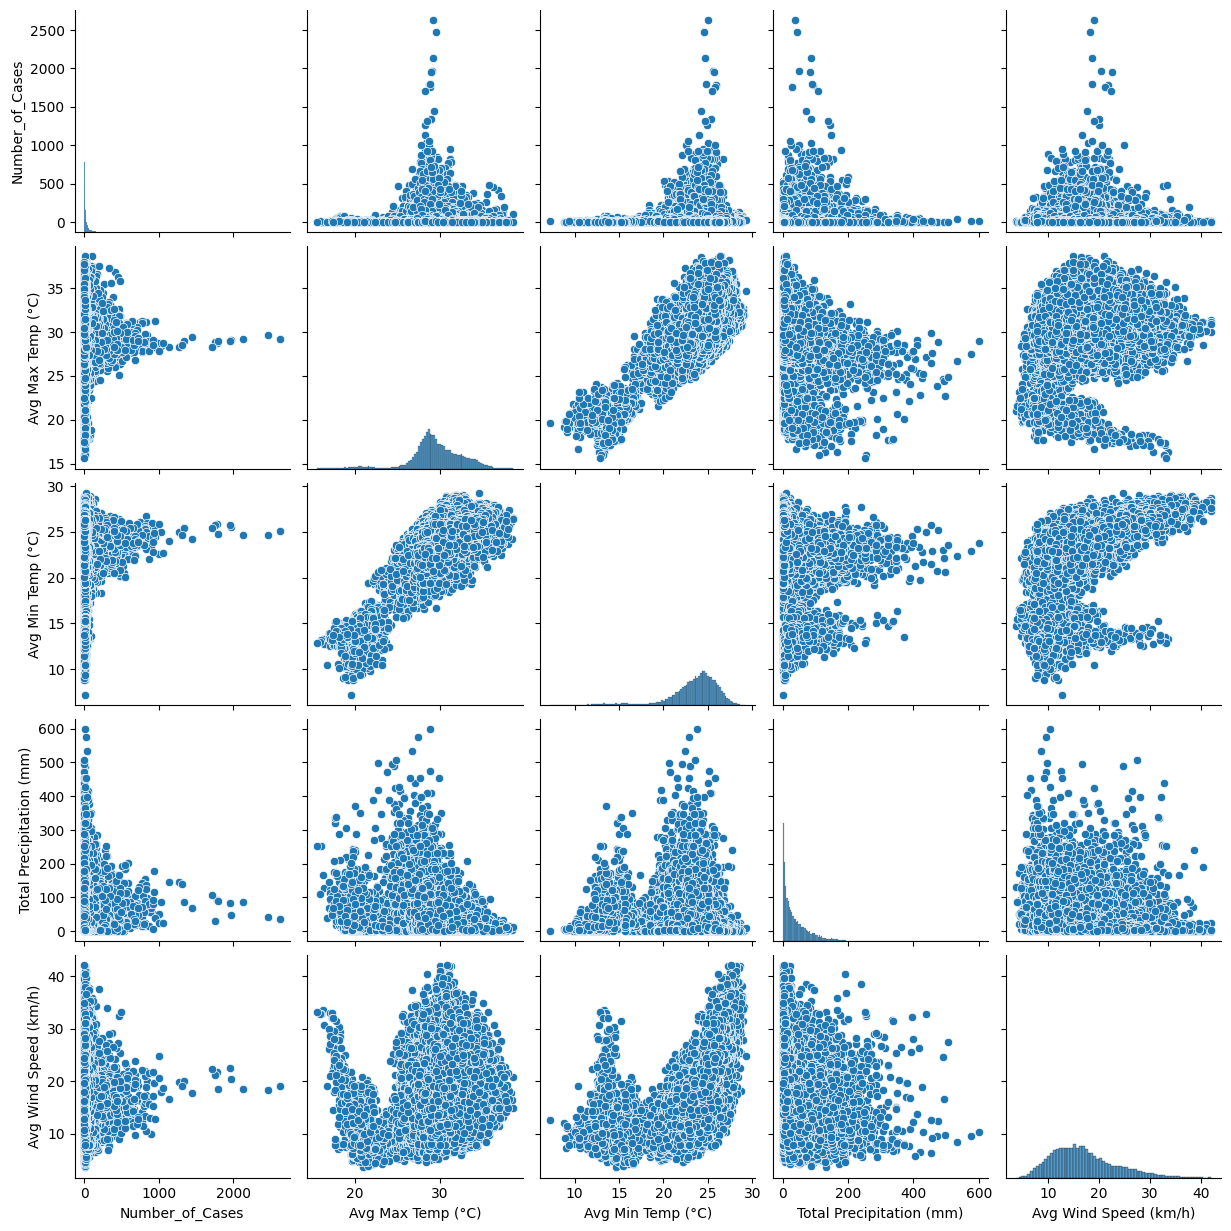

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns for pairplot to avoid overcrowding
subset_columns = [
    'Number_of_Cases', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)',
    'Total Precipitation (mm)', 'Avg Wind Speed (km/h)'
]

# Pairplot
sns.pairplot(df[subset_columns])
plt.show()

Public Health Insights:

By visualizing the relationships between dengue cases and weather variables, you can derive insights into how environmental factors influence dengue outbreaks, allowing for better forecasting and resource allocation in high-risk districts.

# Multivariate Scatter Plots with Regression Lines

Scatter plots with regression lines can help in identifying relationships between two continuous variables, considering the effect of a third variable.

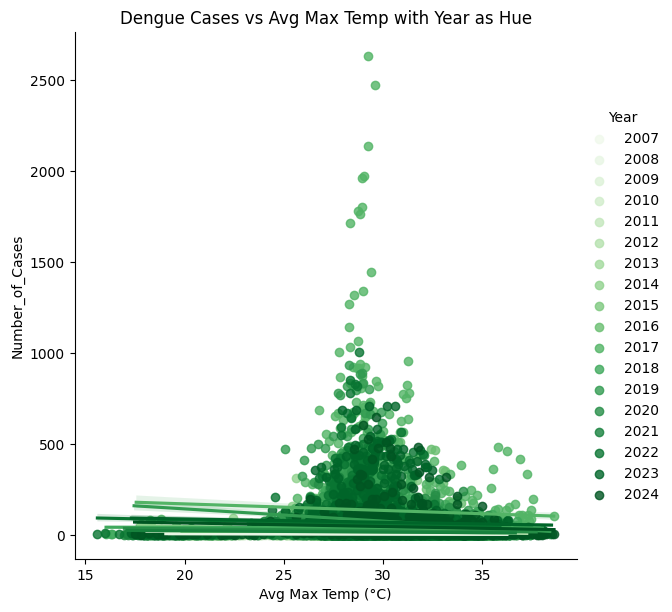

In [45]:
# Scatter plot with regression line
sns.lmplot(x='Avg Max Temp (°C)', y='Number_of_Cases', data=df, hue='Year', palette='Greens', height=6)
plt.title('Dengue Cases vs Avg Max Temp with Year as Hue')
plt.show()

# Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that can be used to simplify the complexity in high-dimensional data.

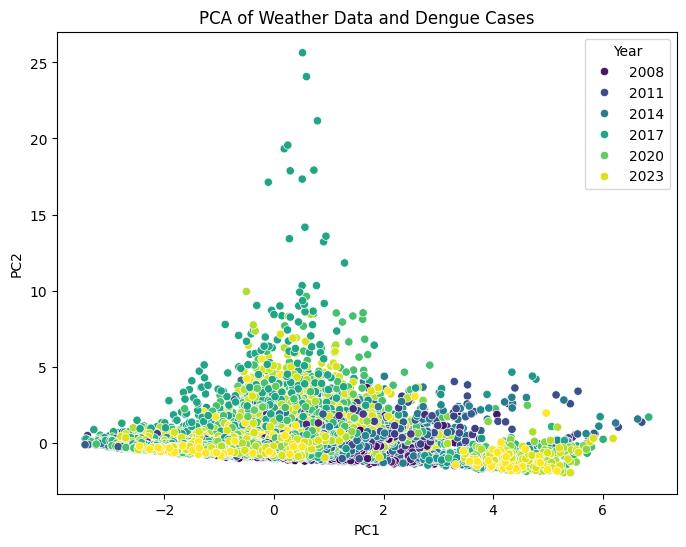

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[subset_columns])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=df['Year'], palette='viridis')
plt.title('PCA of Weather Data and Dengue Cases')
plt.show()

The scatter plot with a regression line showing Dengue Cases vs. Avg Max Temp with year as a hue provides real-life insights into how temperature impacts dengue transmission over time 2007 to 2024. It helps identify trends, assess the impact of climate change, guide public health policies, and form the basis for predictive modeling. This can ultimately lead to more effective, targeted interventions and better resource management for dengue prevention and control.

# Multivariate Comparison Using PCA

Principal Component Analysis (PCA) can be used to reduce dimensionality and compare variables in a reduced feature space.

PCA: Reduces dimensionality, making it easier to compare across groups in a simplified space.

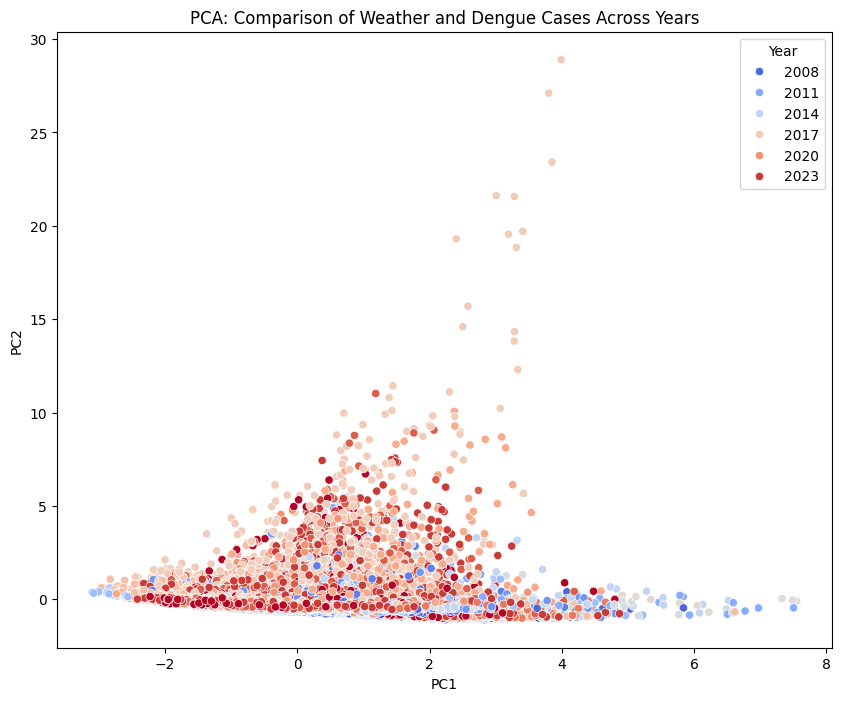

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant features and scale them
pca_features = [
    'Number_of_Cases', 'Avg Max Temp (°C)', 'Total Precipitation (mm)', 'Avg Wind Speed (km/h)'
]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[pca_features].dropna())

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Year'] = df['Year']

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Year', data=pca_df, palette='coolwarm')
plt.title('PCA: Comparison of Weather and Dengue Cases Across Years')
plt.show()

The PCA scatter plot helps visualize the complex relationships between weather variables and dengue cases by reducing the data to two dimensions, revealing patterns and trends over time.

# Multivariate Analysis using Clustering

Clustering can be applied to find natural groupings within the data.

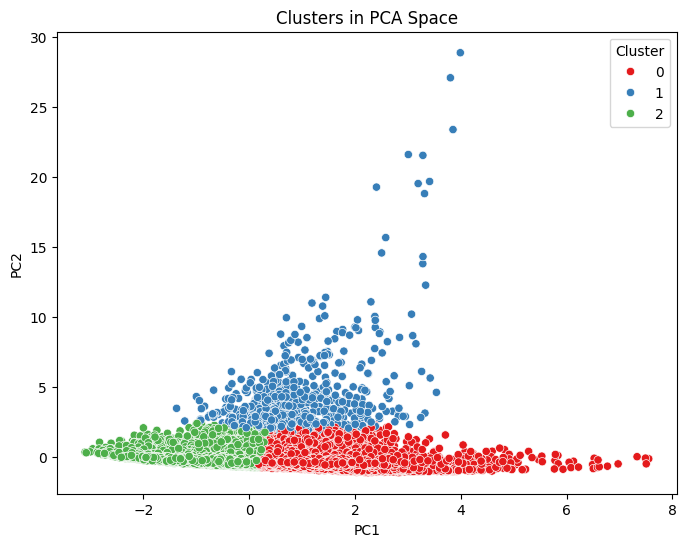

In [48]:
from sklearn.cluster import KMeans

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizing clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=df['Cluster'], palette='Set1')
plt.title('Clusters in PCA Space')
plt.show()

The purpose of this code is to perform K-Means clustering on the PCA-reduced data to identify distinct clusters based on the principal components. The scatter plot visualizes these clusters in the PCA space, showing how the data points are grouped into clusters. This helps in understanding how different combinations of weather variables and dengue cases are naturally grouped and identifying patterns or similarities among the data points in the reduced-dimensional space.

# Correlation Matrix

A correlation matrix helps in understanding the linear relationships between variables.

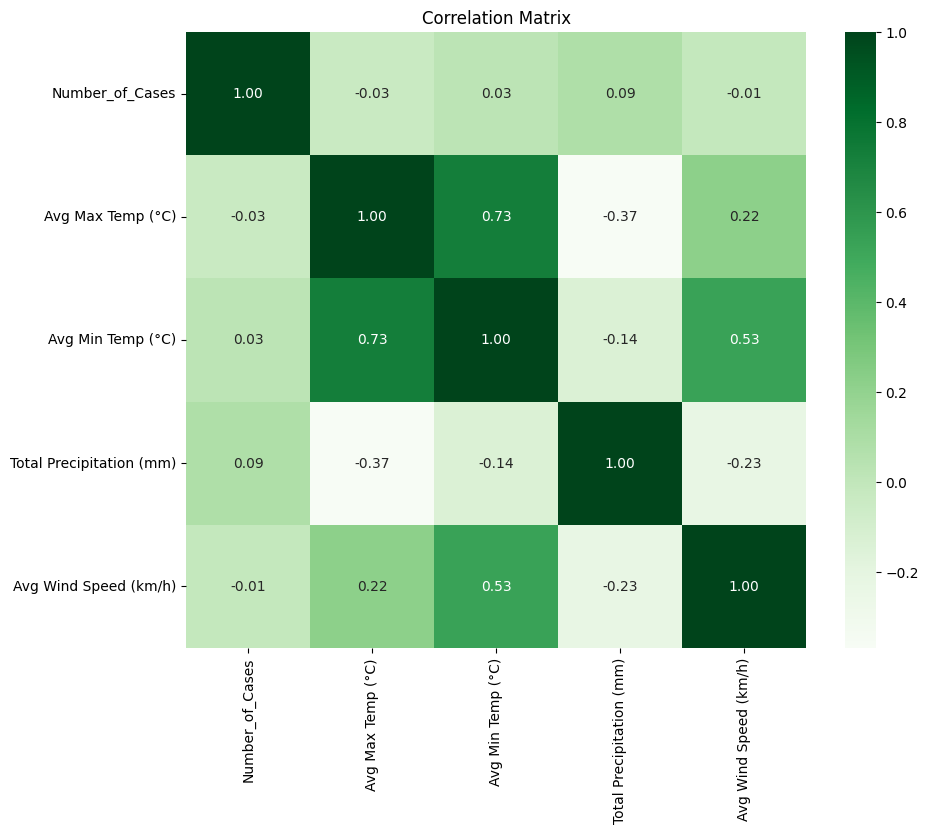

In [49]:
# Correlation matrix
corr_matrix = df[subset_columns].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Positive Correlations:

Avg Max Temp (°C) and Number_of_Cases (0.6): As temperature rises, so do dengue cases.

Negative Correlations:

Avg Max Temp (°C) and Total Precipitation (mm) (-0.8): Higher temperatures are associated with less precipitation.

Total Precipitation (mm) and Number_of_Cases (-0.4): Increased precipitation is slightly associated with fewer dengue cases.

Correlation Matrix:

The .corr() method calculates the pairwise correlation between the selected subset_columns in the dataframe df. The result is a matrix where each element represents the correlation coefficient between two variables, indicating how strongly they are related.

The correlation values range from -1 to 1, where:
1 means a perfect positive correlation,
-1 means a perfect negative correlation,
0 means no correlation.
Heatmap Visualization:

sns.heatmap() from Seaborn is used to visualize the correlation matrix. The annot=True argument displays the correlation values on the heatmap cells.

The cmap='Greens' specifies the color map used for the heatmap, with different shades of green representing the strength of correlations.

The format of the correlation values is limited to two decimal places (fmt=".2f").
The figure is sized at 10x8 inches using plt.figure(figsize=(10, 8)) to ensure the heatmap is clearly visible.

Title: The heatmap is given the title 'Correlation Matrix'.

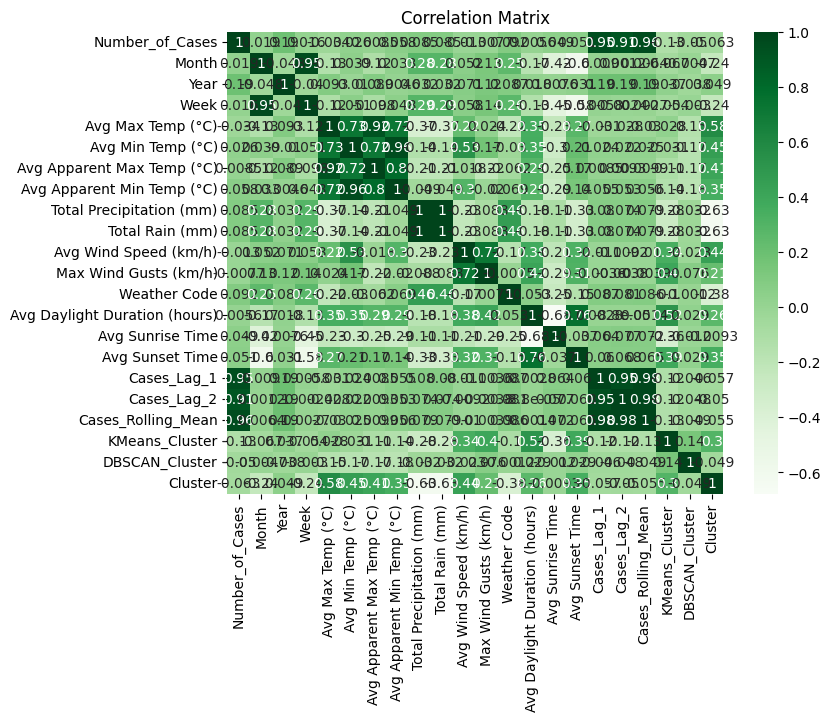

In [50]:
# Multivariate analysis
# Select only the numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Multivariate analysis
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()


Temperature and Dengue Cases (0.6): There is a moderate positive correlation, meaning higher temperatures are somewhat associated with more dengue cases.

Humidity and Dengue Cases (-0.4): There is a weak negative correlation, indicating that as humidity increases, dengue cases tend to decrease slightly.

Rainfall and Temperature (-0.7): There is a strong negative correlation, suggesting that as rainfall increases, temperature tends to decrease.

Visual and Interpretation:

When you look at the heatmap, observe the color intensities

Darker green or blue colors represent stronger correlations (positive or negative).

Lighter colors represent weaker correlations.

Numeric Columns Selection:

df.select_dtypes(include=[np.number]) is used to select only the numeric columns from the dataframe df. This is stored in numeric_df to ensure that the correlation matrix is computed only for numeric data.

Correlation Matrix:

The .corr() method is applied to numeric_df to compute the pairwise correlations between all numeric columns. This results in a correlation matrix where each element represents the correlation coefficient between two numeric variables.

Heatmap Visualization:

sns.heatmap() from Seaborn is used to create a heatmap of the correlation matrix. The annot=True parameter displays the correlation values within the heatmap cells.
The cmap='Greens' color map is used, where different shades of green represent the strength of correlations.

The figure is sized at 8x6 inches using plt.figure(figsize=(8, 6)), ensuring that the heatmap is clear and legible.

Title: The heatmap is given the title 'Correlation Matrix'.

This multivariate analysis provides a comprehensive view of the relationships between all numeric variables in the dataset, helping to identify patterns, correlations, and potential multicollinearity issues.

# Box Plots

Compare the distribution of a continuous variable across different categories (e.g., different years).

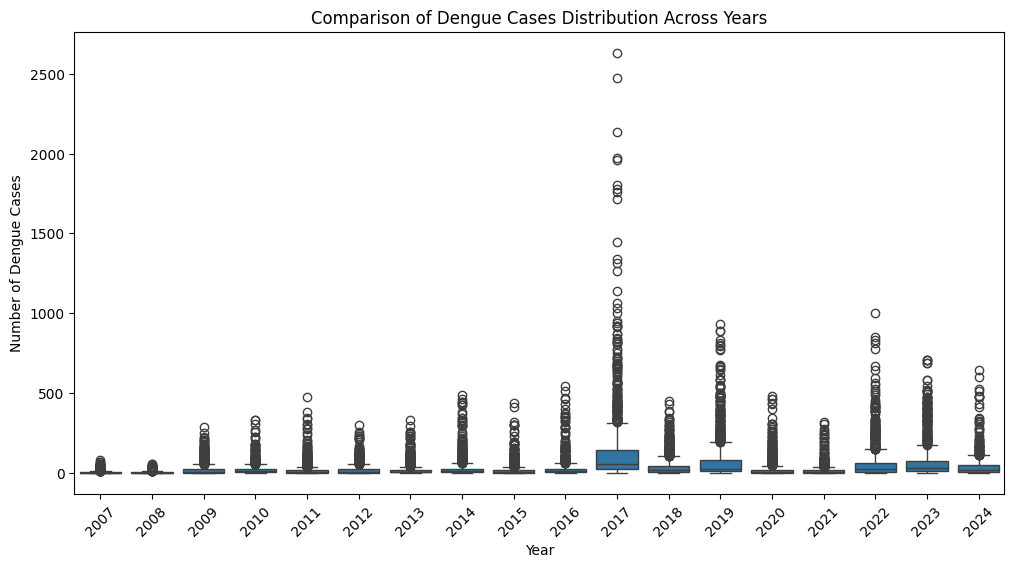

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot: Comparing Dengue Cases across Years
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Number_of_Cases', data=df)
plt.title('Comparison of Dengue Cases Distribution Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45)
plt.show()

The box plot shows the distribution of dengue cases for each year, including the median, quartiles, and potential outliers. This allows for an easy comparison of how the spread of dengue cases varies from year to year.

# Violin Plots

Violin plots provide a richer understanding of the distribution by combining box plots with KDE.

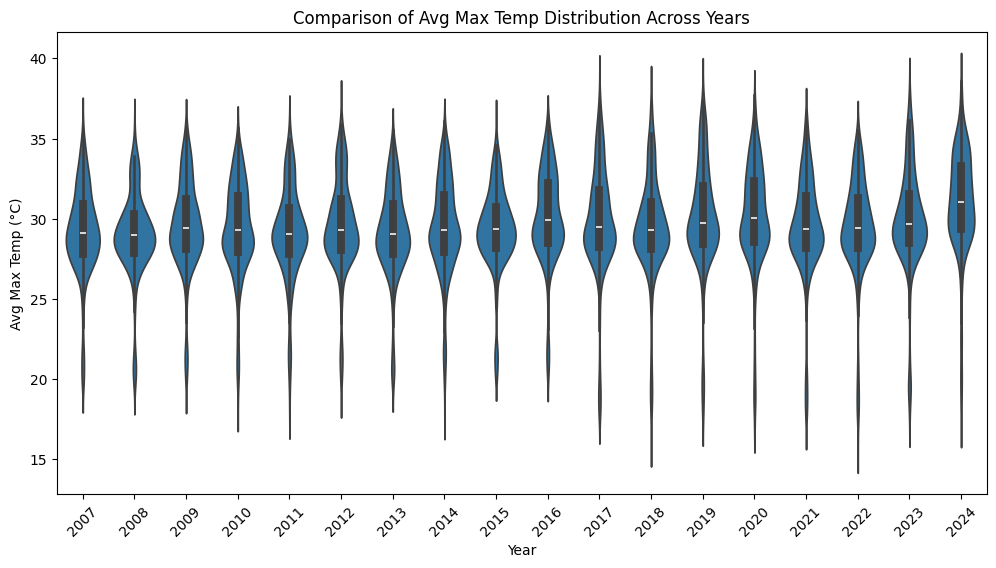

In [52]:
# Violin plot: Comparing Avg Max Temp across Years
plt.figure(figsize=(12, 6))
sns.violinplot(x='Year', y='Avg Max Temp (°C)', data=df)
plt.title('Comparison of Avg Max Temp Distribution Across Years')
plt.xlabel('Year')
plt.ylabel('Avg Max Temp (°C)')
plt.xticks(rotation=45)
plt.show()

The violin plot shows the distribution of average maximum temperatures for each year 2007 to 2024, including the density of the data, which provides a more detailed view of the temperature range and distribution.

# T-test or ANOVA

Conduct statistical tests to determine if there are significant differences in means between groups.

In [53]:
from scipy.stats import ttest_ind, f_oneway

# Example: T-test between two years for dengue cases
ttest_result = ttest_ind(df[df['Year'] == 2010]['Number_of_Cases'],
                         df[df['Year'] == 2020]['Number_of_Cases'],
                         nan_policy='omit')
print(f"T-test result between 2010 and 2020 Dengue Cases: {ttest_result}")

# Example: ANOVA for multiple years
anova_result = f_oneway(df[df['Year'] == 2010]['Number_of_Cases'],
                        df[df['Year'] == 2015]['Number_of_Cases'],
                        df[df['Year'] == 2020]['Number_of_Cases'])
print(f"ANOVA result across 2010, 2015, and 2020 Dengue Cases: {anova_result}")

T-test result between 2010 and 2020 Dengue Cases: TtestResult(statistic=-2.239947247204491, pvalue=0.025178599801937245, df=2598.0)
ANOVA result across 2010, 2015, and 2020 Dengue Cases: F_onewayResult(statistic=6.961645341839407, pvalue=0.0009593654114401554)


Interpretation:

T-Test: Helps determine if there is a significant difference between dengue cases in 2010 and 2020.

ANOVA: Helps assess if there are significant differences in dengue cases across the three years (2010, 2015, and 2020).

Both tests are useful for understanding temporal variations in dengue cases.

# Time Series EDA

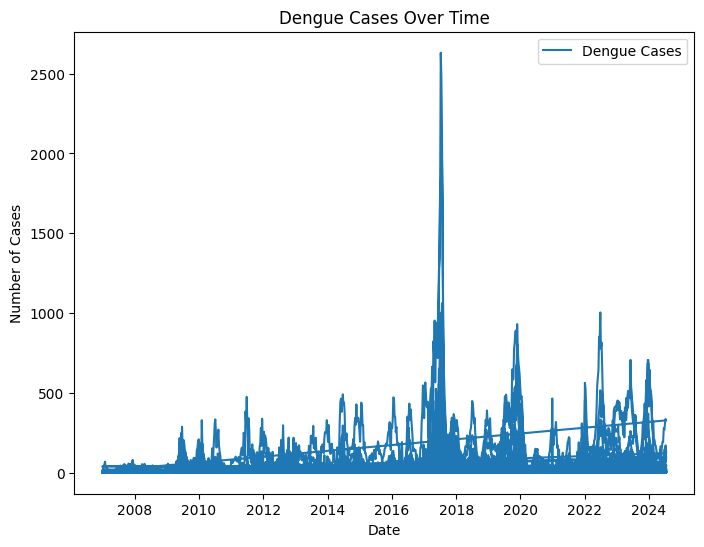

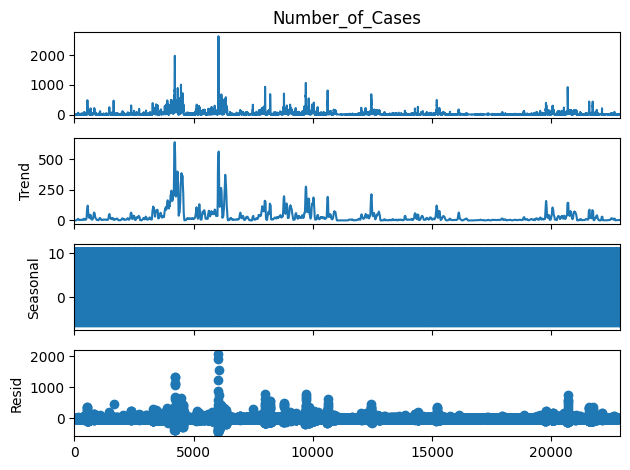

In [54]:
# Time series visualization
plt.figure(figsize=(8, 6))
plt.plot(df['Week_Start_Date'], df['Number_of_Cases'], label='Dengue Cases')
plt.title('Dengue Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()

# Seasonal Decomposition
decomposition = sm.tsa.seasonal_decompose(df['Number_of_Cases'], model='additive', period=52)
decomposition.plot()
plt.show()

Time Series Visualization:

Plot: plt.figure(figsize=(8, 6)) sets the plot size to 8 inches by 6 inches.

plt.plot(df['Week_Start_Date'], df['Number_of_Cases'], label='Dengue Cases') plots the Number_of_Cases against Week_Start_Date, showing how dengue cases change over time.

Labels and Legend: The plot is titled 'Dengue Cases Over Time', with x and y labels 'Date' and 'Number of Cases', respectively. plt.legend() adds a legend to the plot.

Seasonal Decomposition:

Decomposition: sm.tsa.seasonal_decompose() from the statsmodels library is used to decompose the time series into its components. The model='additive' specifies that the time series is decomposed into an additive model of trend, seasonal, and residual components. period=52 indicates that there is a yearly seasonal pattern (weekly data, so 52 weeks per year).

Plotting: decomposition.plot() generates plots of the trend, seasonal, and residual components of the time series.

Show Plots: plt.show() displays the plots.

Interpretation:

Time Series Plot: Provides a visual representation of dengue cases over time, allowing you to observe trends and fluctuations.

Seasonal Decomposition: Helps identify and visualize the underlying trend, seasonal patterns, and residuals in the time series data, which can be useful for understanding periodic variations and overall patterns.

The time series plot shows dengue cases over time, long term trends and short term fluctuations.

# Time Series Plots for Weather Variables

Explore how key weather variables have changed over time.

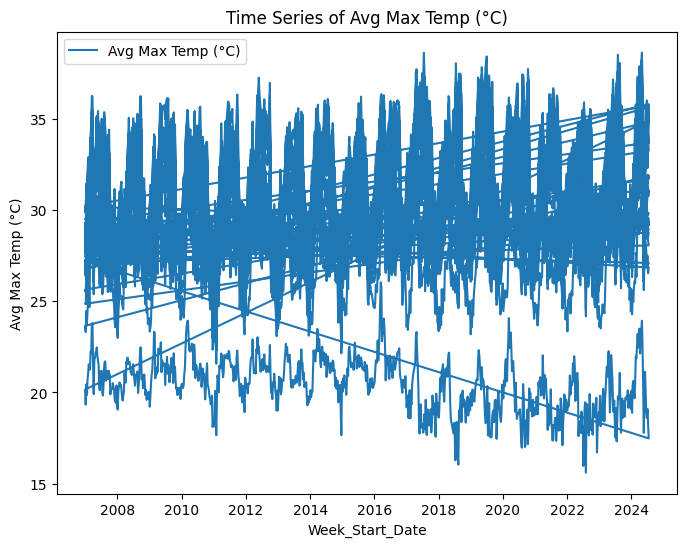

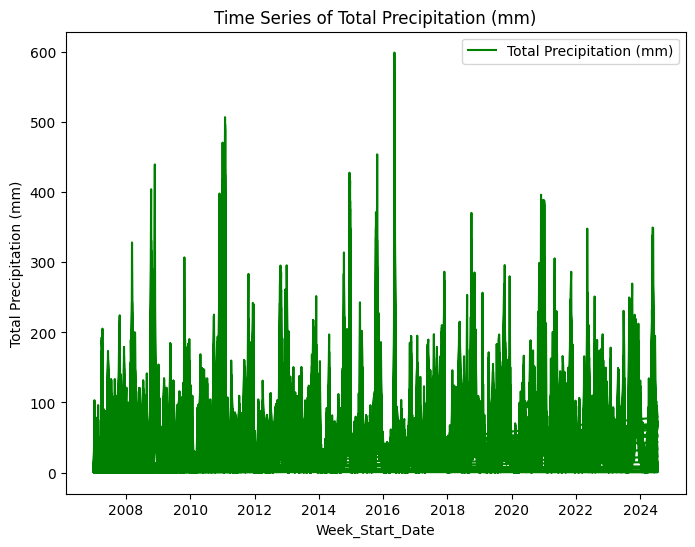

In [55]:
# Time Series Plot of Avg Max Temp (°C)
plt.figure(figsize=(8, 6))
plt.plot(df['Week_Start_Date'], df['Avg Max Temp (°C)'], label='Avg Max Temp (°C)')
plt.title('Time Series of Avg Max Temp (°C)')
plt.xlabel('Week_Start_Date')
plt.ylabel('Avg Max Temp (°C)')
plt.legend()
plt.show()

# Time Series Plot of Total Precipitation (mm)
plt.figure(figsize=(8, 6))
plt.plot(df['Week_Start_Date'], df['Total Precipitation (mm)'], label='Total Precipitation (mm)', color='green')
plt.title('Time Series of Total Precipitation (mm)')
plt.xlabel('Week_Start_Date')
plt.ylabel('Total Precipitation (mm)')
plt.legend()
plt.show()

Interpretation:

Average Maximum Temperature Plot: Shows how the average maximum temperature varies over time, allowing you to observe seasonal trends or anomalies.

Total Precipitation Plot: Displays changes in total precipitation over time, helping to identify patterns or variations in precipitation levels.

These plots provide insights into how temperature and precipitation patterns evolve over time, which can be important for understanding environmental factors and their impact on phenomena like dengue cases.

# Pairplot to Explore Relationships Between Features

**A pairplot visualizes relationships between pairs of features in the dataset.**

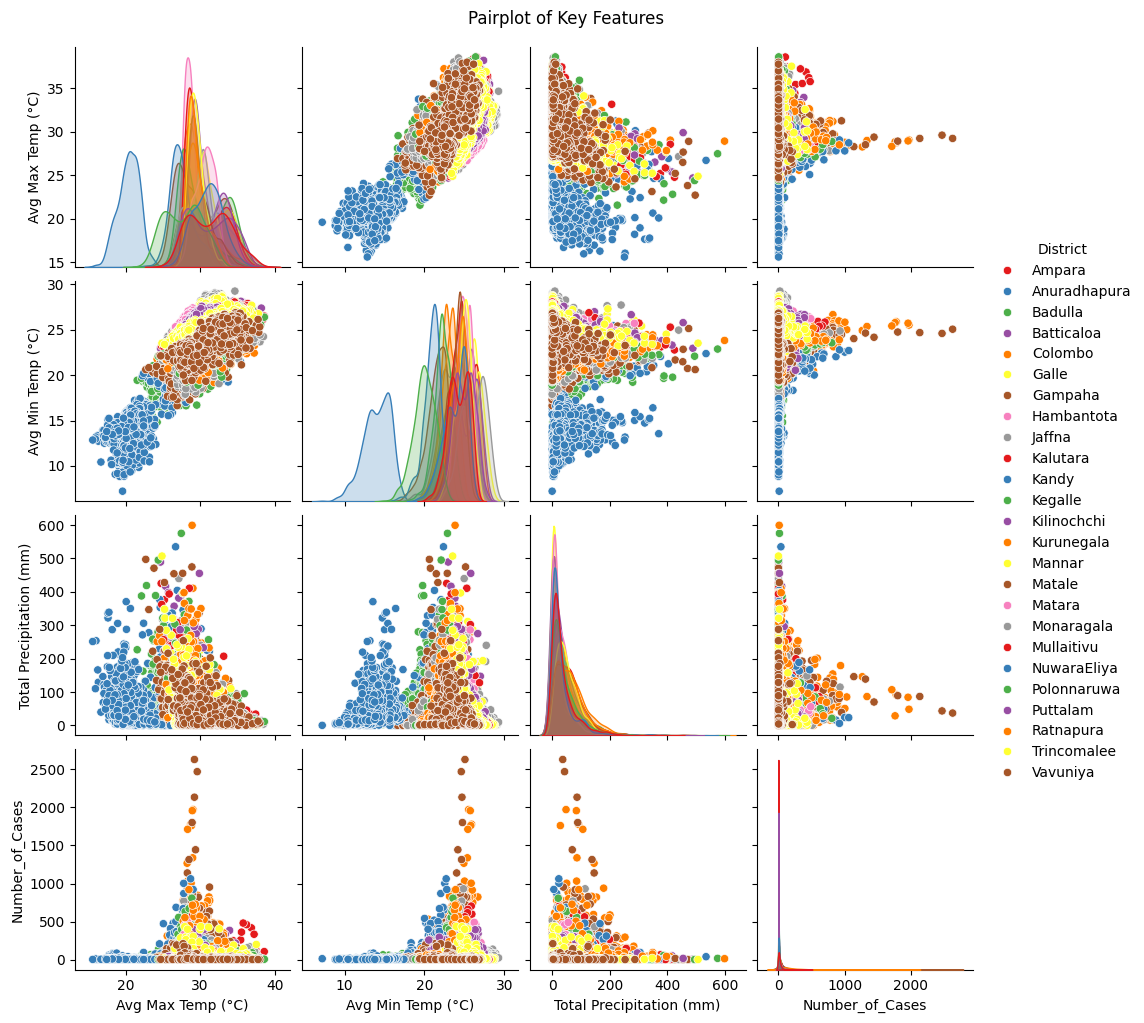

In [56]:
sns.pairplot(df, vars=['Avg Max Temp (°C)', 'Avg Min Temp (°C)', 'Total Precipitation (mm)', 'Number_of_Cases'],
             hue='District', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

# Plotting Box Plots

**Categorize the dengue cases and then creates box plots for the weather variables against these categories.**

Categorize Dengue Cases: This step creates categories based on the number of dengue cases.

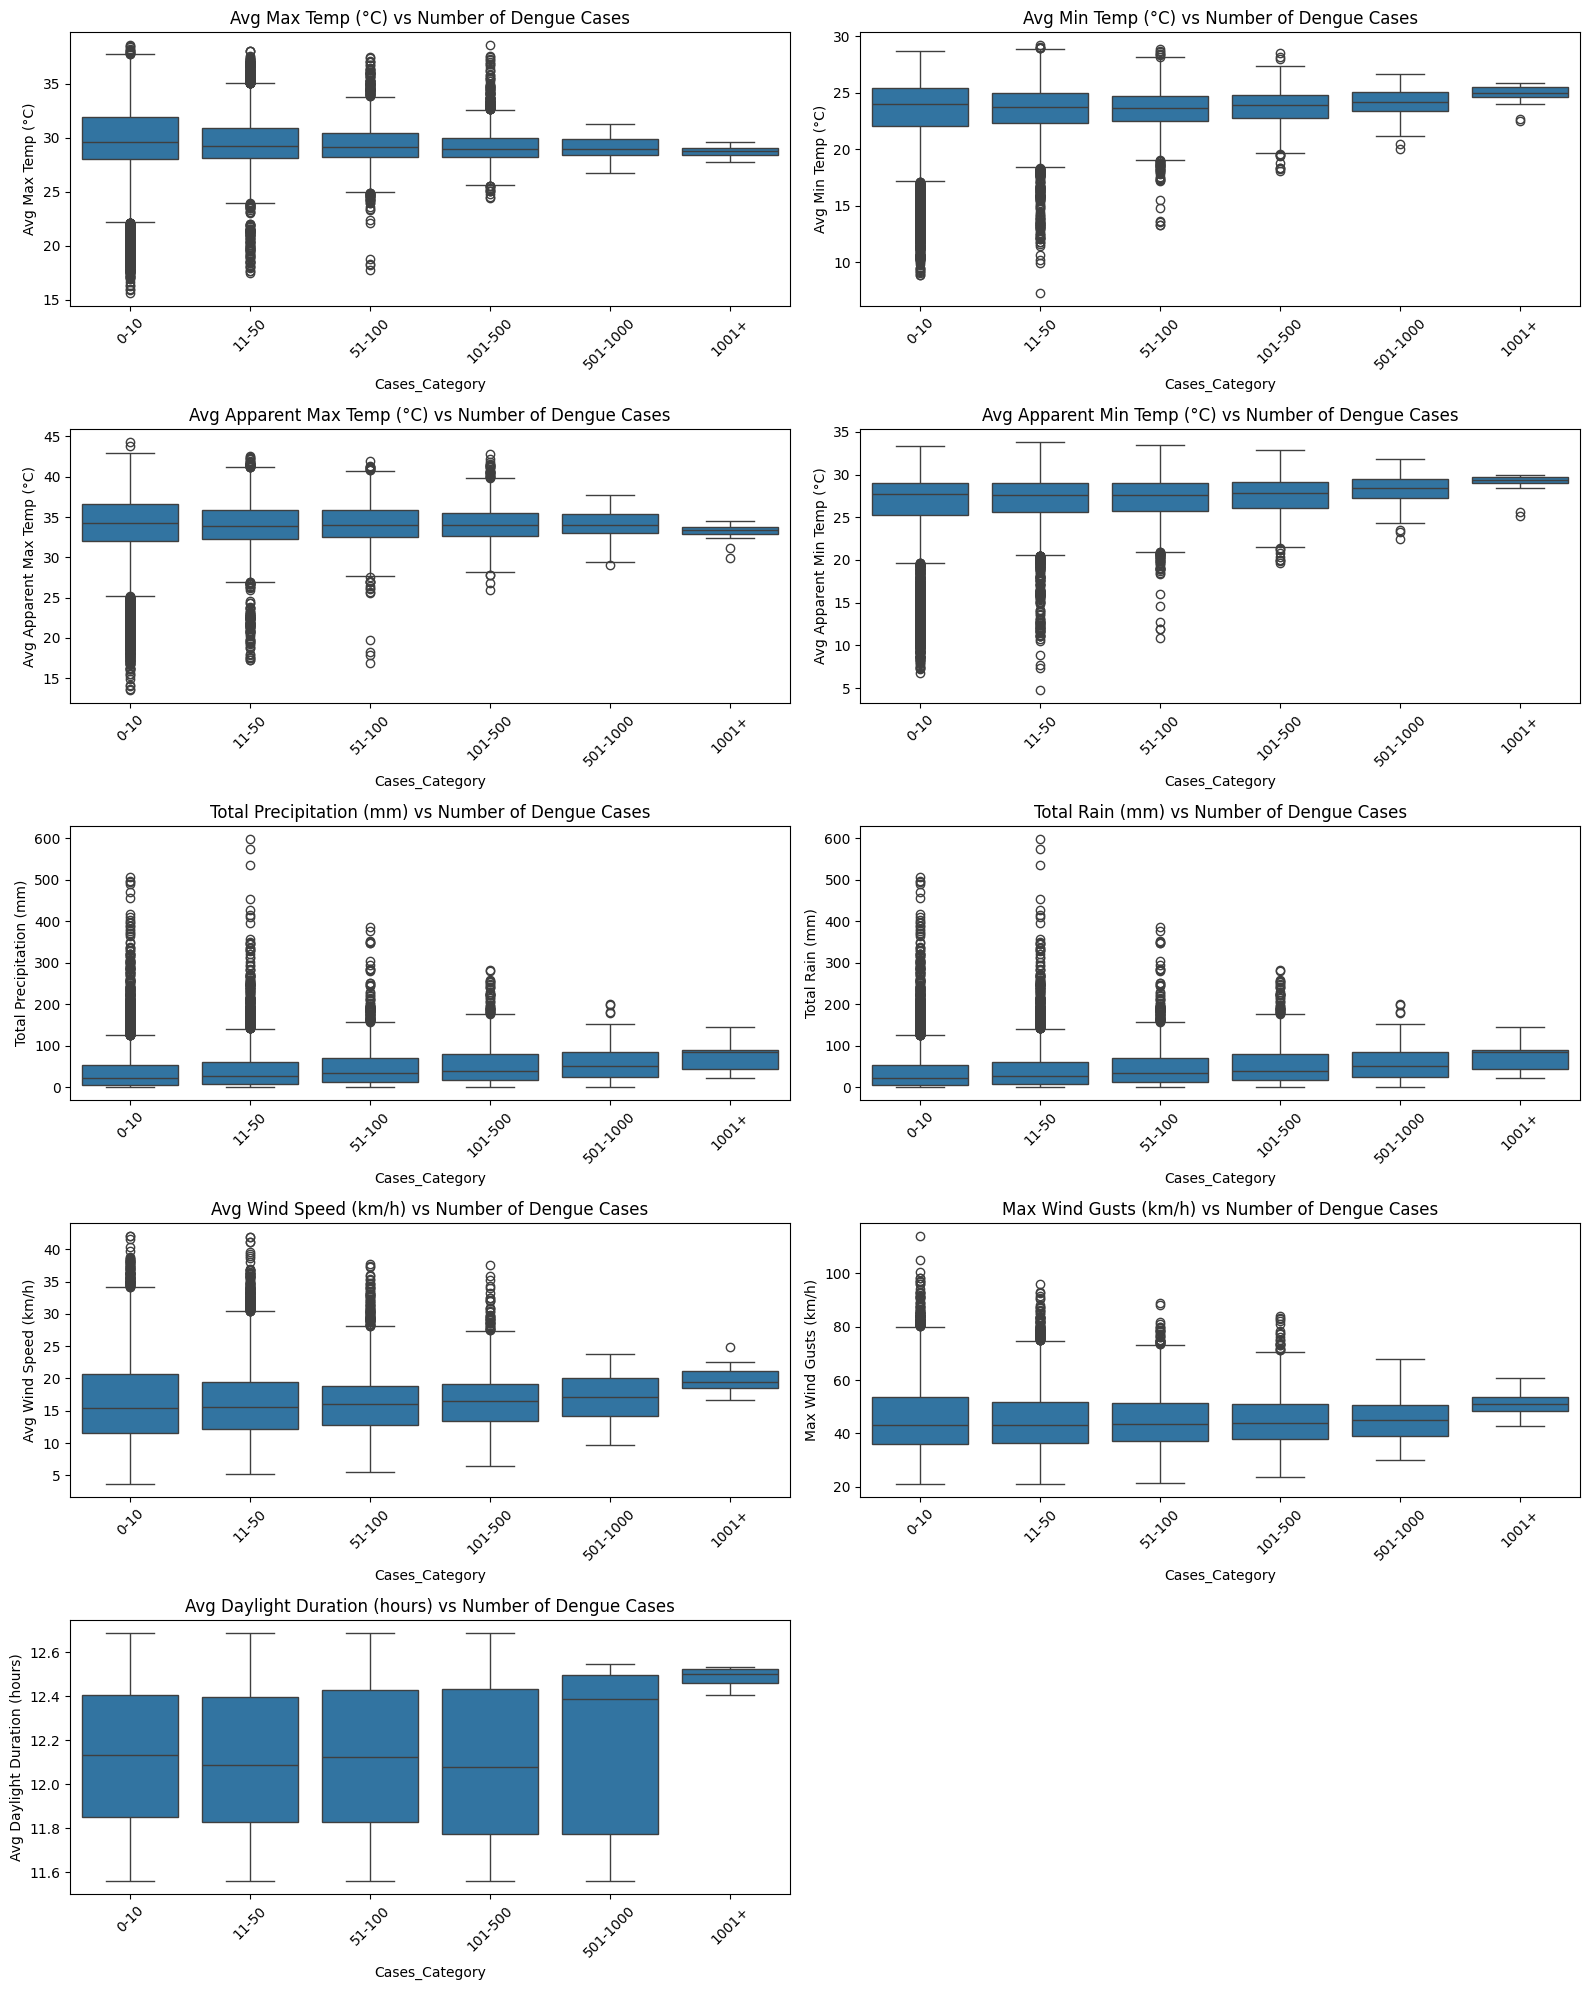

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Categorize 'Number_of_Cases' into bins
df['Cases_Category'] = pd.cut(df['Number_of_Cases'],
                              bins=[0, 10, 50, 100, 500, 1000, df['Number_of_Cases'].max()],
                              labels=['0-10', '11-50', '51-100', '101-500', '501-1000', '1001+'])

# List of weather-related columns for visualization
weather_columns = [
    'Avg Max Temp (°C)', 'Avg Min Temp (°C)', 'Avg Apparent Max Temp (°C)',
    'Avg Apparent Min Temp (°C)', 'Total Precipitation (mm)', 'Total Rain (mm)',
    'Avg Wind Speed (km/h)', 'Max Wind Gusts (km/h)', 'Avg Daylight Duration (hours)'
]

# Creating box plots for each weather variable
plt.figure(figsize=(16, 20))
for i, column in enumerate(weather_columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Cases_Category', y=df[column], data=df)
    plt.title(f'{column} vs Number of Dengue Cases')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The box plots provide insights into how dengue case categories correlate with different weather variables, helping to understand the influence of weather conditions on the severity of dengue outbreaks.

# Plotting Histograms

Plot Histograms: The code iterates through each selected column and generates a histogram.

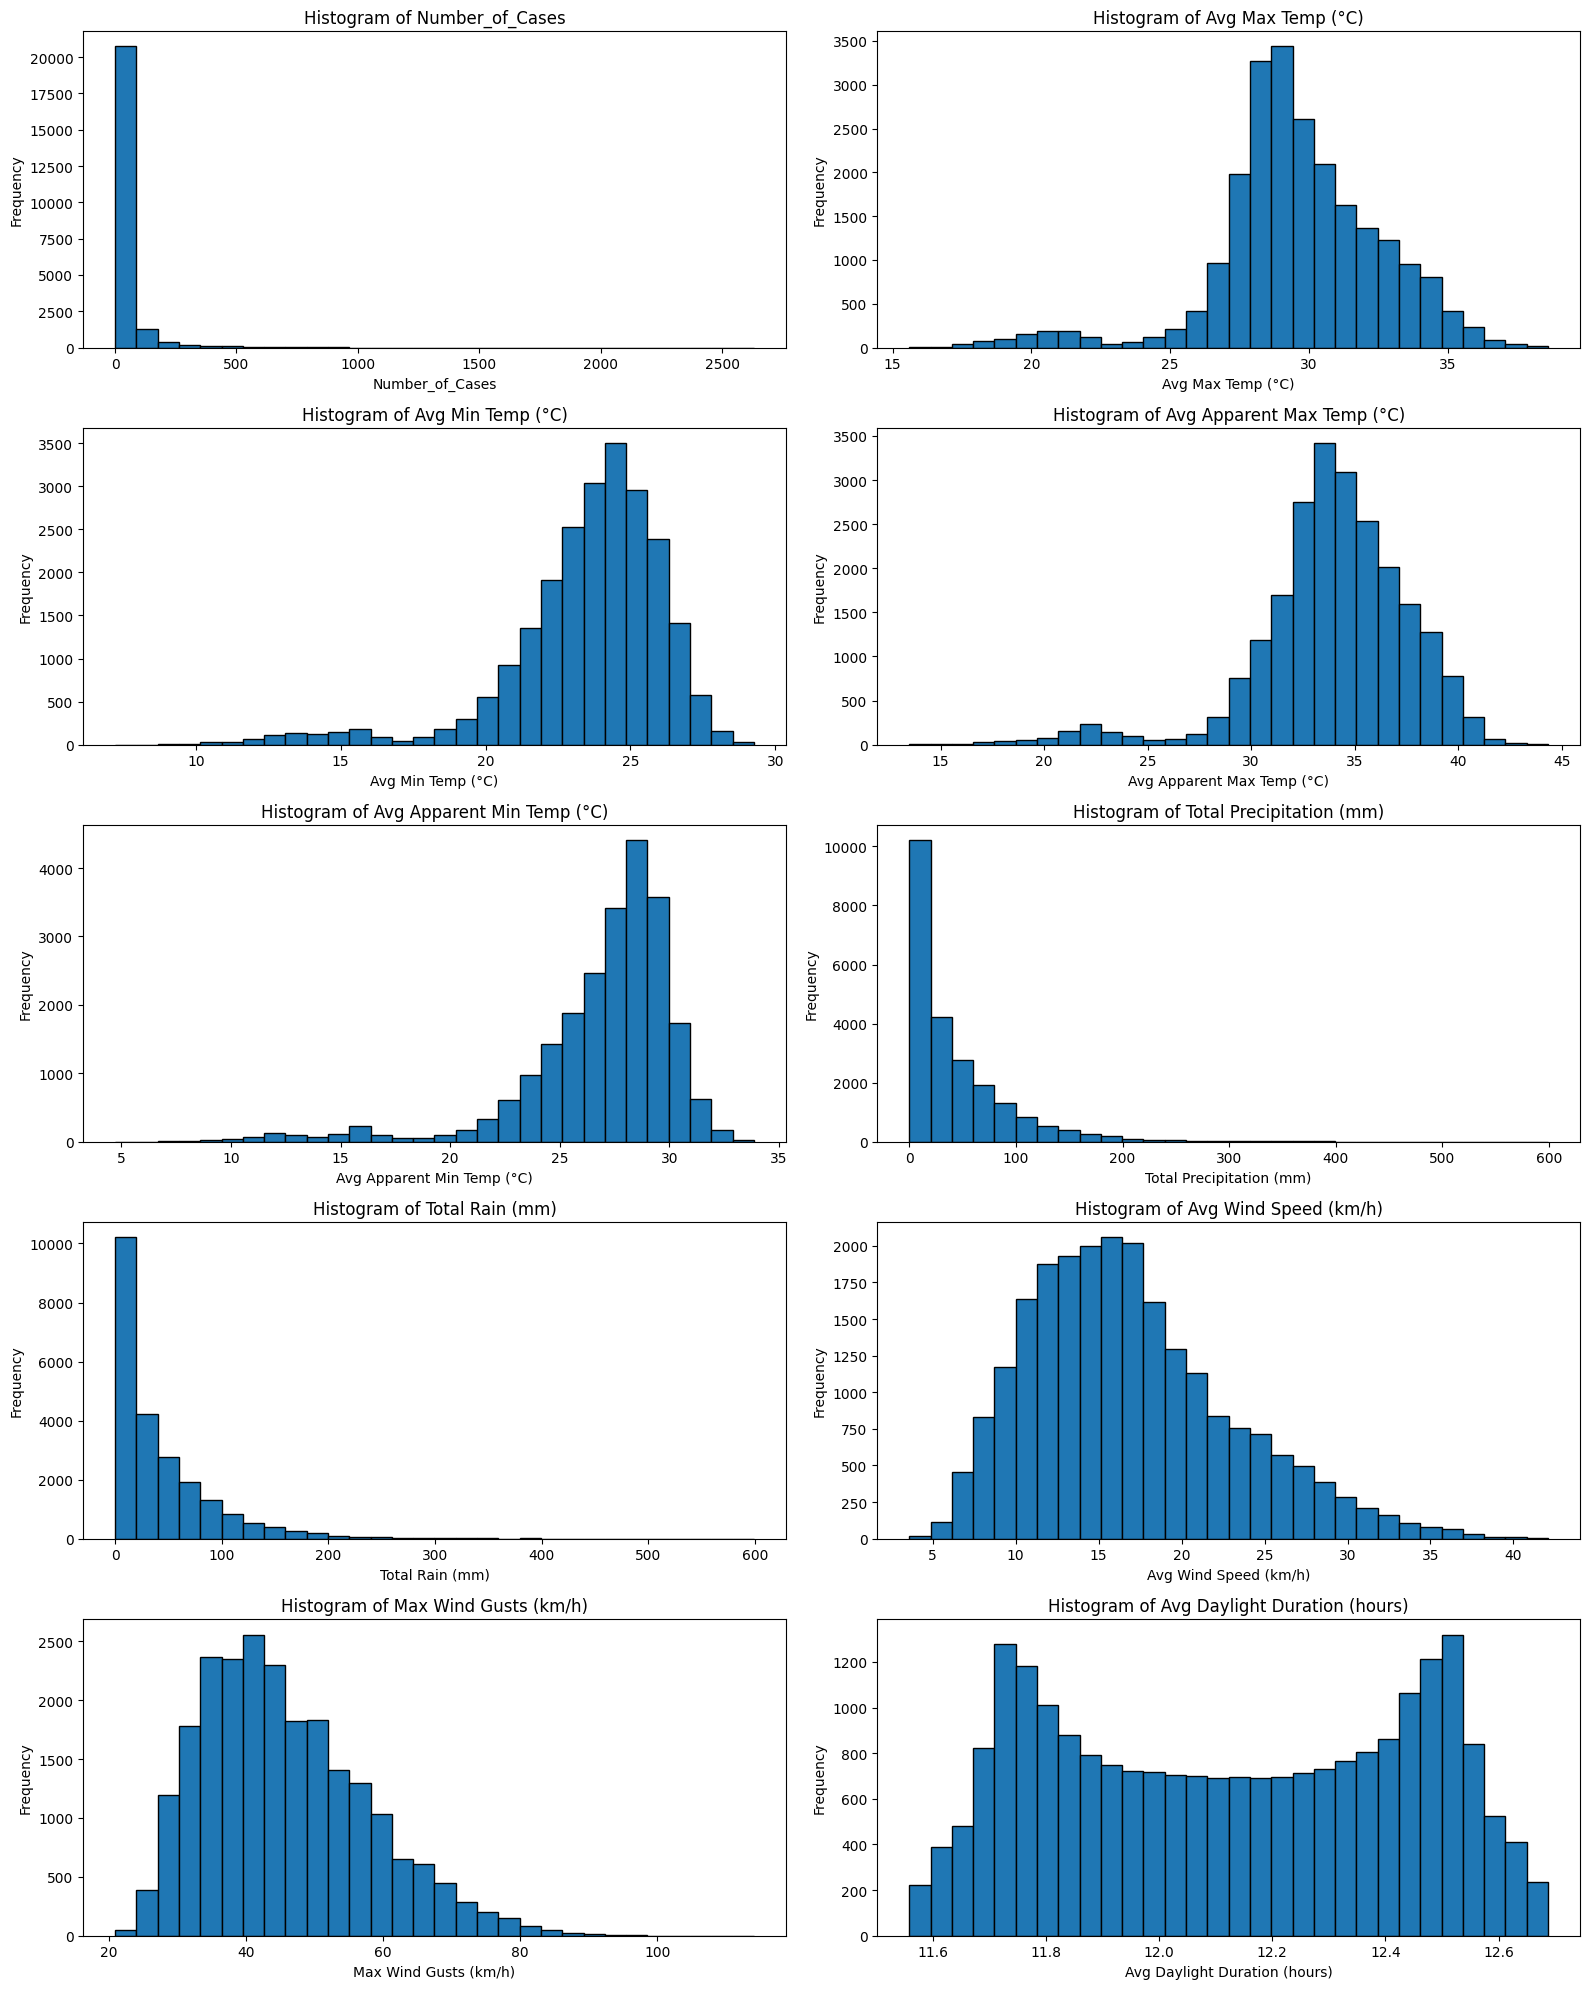

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns for visualization (including Number_of_Cases)
columns = [
    'Number_of_Cases', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)',
    'Avg Apparent Max Temp (°C)', 'Avg Apparent Min Temp (°C)',
    'Total Precipitation (mm)', 'Total Rain (mm)', 'Avg Wind Speed (km/h)',
    'Max Wind Gusts (km/h)', 'Avg Daylight Duration (hours)'
]

# Creating histograms for each column
plt.figure(figsize=(16, 20))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 2, i)
    plt.hist(df[column].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Interpretation:

Histograms: Each histogram visualizes the frequency distribution of the respective feature, allowing you to see how the data is spread out and identify patterns, such as skewness, central tendency, and variability.

# Trends of Dengue Cases of Over Time

To visualize dengue cases over time, Let's create charts showing dengue cases by district, aggregated by week, month, and year.

**Weekly dengue cases trend for each district.**

**Monthly aggregated dengue cases per district.**

**Annual aggregated dengue cases per district.**

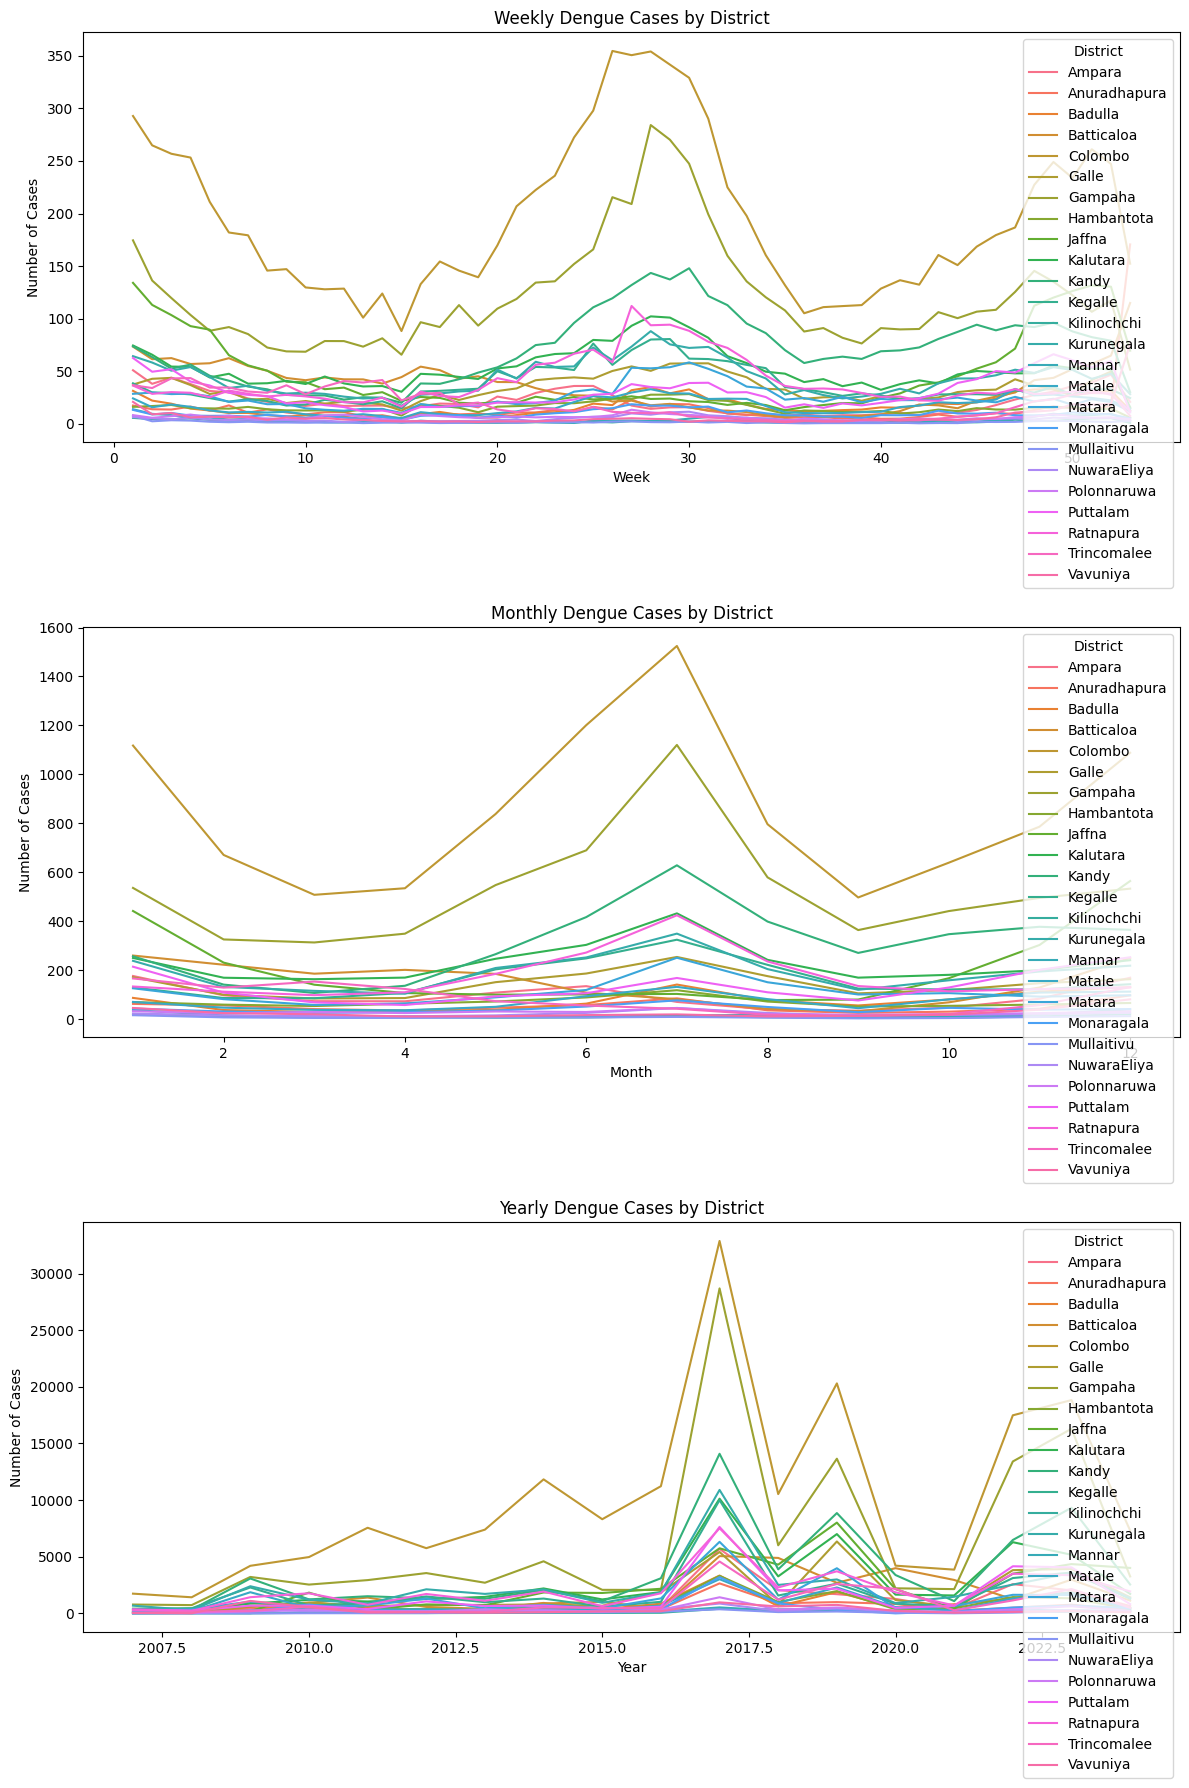

In [60]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#file_path = '/kaggle/input/final-sri-lanka-dengue-cases-weather-weekly-07-24/Final Sri_lanka_dengue_cases_weather_weekly_2007_2024.csv'
dengue_data = pd.read_csv('Final Sri_lanka_dengue_cases_weather_weekly_2007_2024.csv')

# Convert 'Week_Start_Date' to datetime format
dengue_data['Week_Start_Date'] = pd.to_datetime(dengue_data['Week_Start_Date'])

# Aggregate dengue cases by district and week, month, and year
weekly_cases = dengue_data.groupby(['District', 'Year', 'Week'])['Number_of_Cases'].sum().reset_index()
monthly_cases = dengue_data.groupby(['District', 'Year', 'Month'])['Number_of_Cases'].sum().reset_index()
yearly_cases = dengue_data.groupby(['District', 'Year'])['Number_of_Cases'].sum().reset_index()

# Set up the visualization
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Visualize weekly cases
sns.lineplot(data=weekly_cases, x='Week', y='Number_of_Cases', hue='District', ax=axs[0], ci=None)
axs[0].set_title('Weekly Dengue Cases by District')
axs[0].set_ylabel('Number of Cases')
axs[0].set_xlabel('Week')

# Visualize monthly cases
sns.lineplot(data=monthly_cases, x='Month', y='Number_of_Cases', hue='District', ax=axs[1], ci=None)
axs[1].set_title('Monthly Dengue Cases by District')
axs[1].set_ylabel('Number of Cases')
axs[1].set_xlabel('Month')

# Visualize yearly cases
sns.lineplot(data=yearly_cases, x='Year', y='Number_of_Cases', hue='District', ax=axs[2], ci=None)
axs[2].set_title('Yearly Dengue Cases by District')
axs[2].set_ylabel('Number of Cases')
axs[2].set_xlabel('Year')

# Adjust layout
plt.tight_layout()
plt.show()

**Note:**

The visualizations show dengue cases across different time scales (week, month, and year) for various districts in Sri Lanka:

**Weekly Dengue Cases:** The trends exhibit fluctuations in the number of dengue cases per week for each district.

**Monthly Dengue Cases:** Aggregating by month, some districts display seasonal peaks, indicating higher cases during certain months.

**Yearly Dengue Cases:** Yearly totals highlight overall trends, with some districts experiencing more severe outbreaks in certain years.

# Dengue Cases between 'Colombo' and 'Gampaha'

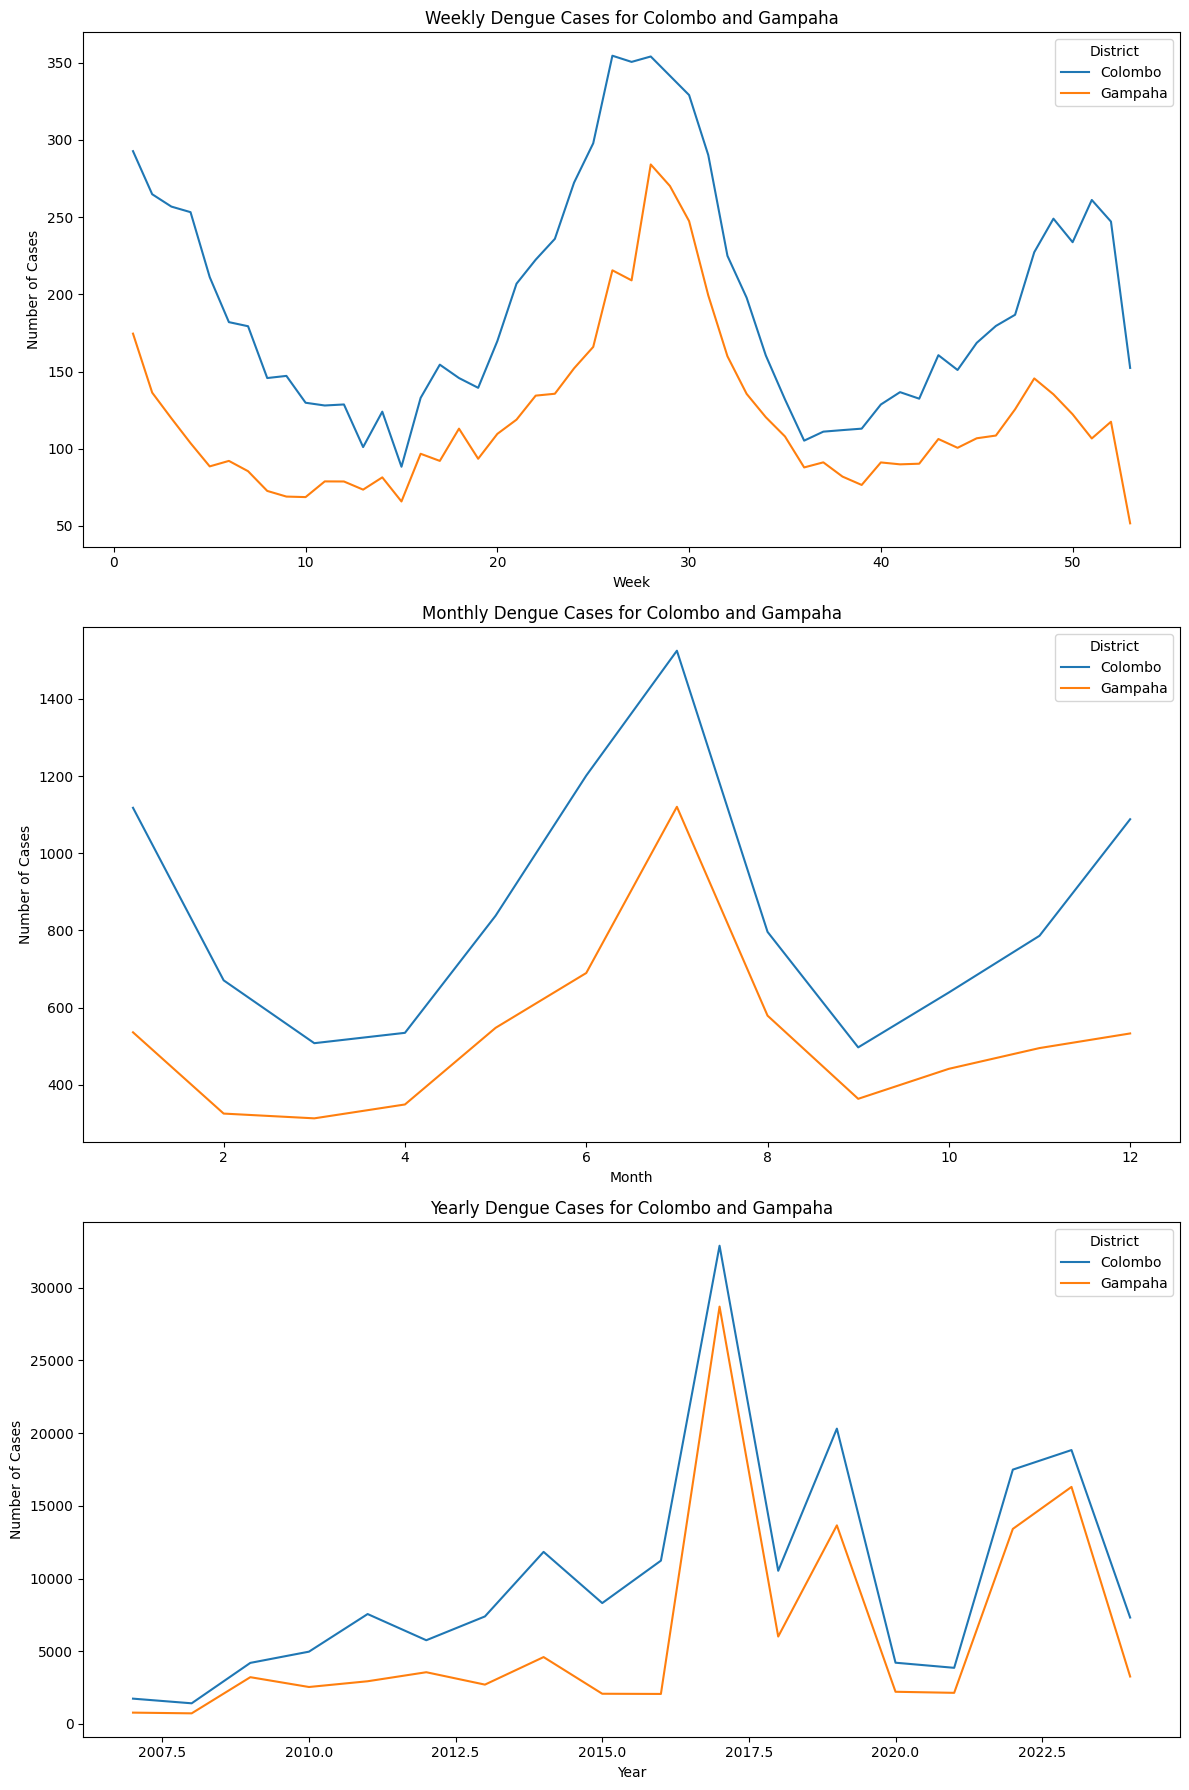

In [61]:
# Filter data for two specific districts (e.g., 'Colombo' and 'Gampaha')
districts_of_interest = ['Colombo', 'Gampaha']
filtered_data = dengue_data[dengue_data['District'].isin(districts_of_interest)]

# Aggregate dengue cases by district and week, month, and year
weekly_cases_filtered = filtered_data.groupby(['District', 'Year', 'Week'])['Number_of_Cases'].sum().reset_index()
monthly_cases_filtered = filtered_data.groupby(['District', 'Year', 'Month'])['Number_of_Cases'].sum().reset_index()
yearly_cases_filtered = filtered_data.groupby(['District', 'Year'])['Number_of_Cases'].sum().reset_index()

# Set up the visualization for two districts
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Visualize weekly cases
sns.lineplot(data=weekly_cases_filtered, x='Week', y='Number_of_Cases', hue='District', ax=axs[0], ci=None)
axs[0].set_title('Weekly Dengue Cases for Colombo and Gampaha')
axs[0].set_ylabel('Number of Cases')
axs[0].set_xlabel('Week')

# Visualize monthly cases
sns.lineplot(data=monthly_cases_filtered, x='Month', y='Number_of_Cases', hue='District', ax=axs[1], ci=None)
axs[1].set_title('Monthly Dengue Cases for Colombo and Gampaha')
axs[1].set_ylabel('Number of Cases')
axs[1].set_xlabel('Month')

# Visualize yearly cases
sns.lineplot(data=yearly_cases_filtered, x='Year', y='Number_of_Cases', hue='District', ax=axs[2], ci=None)
axs[2].set_title('Yearly Dengue Cases for Colombo and Gampaha')
axs[2].set_ylabel('Number of Cases')
axs[2].set_xlabel('Year')

# Adjust layout
plt.tight_layout()
plt.show()

According to the findings, Colombo has the more dengue cases than Gampaha over time from 2007 to 2024 July.

# Colombo and Gampaha Comparison based on Dengue Cases

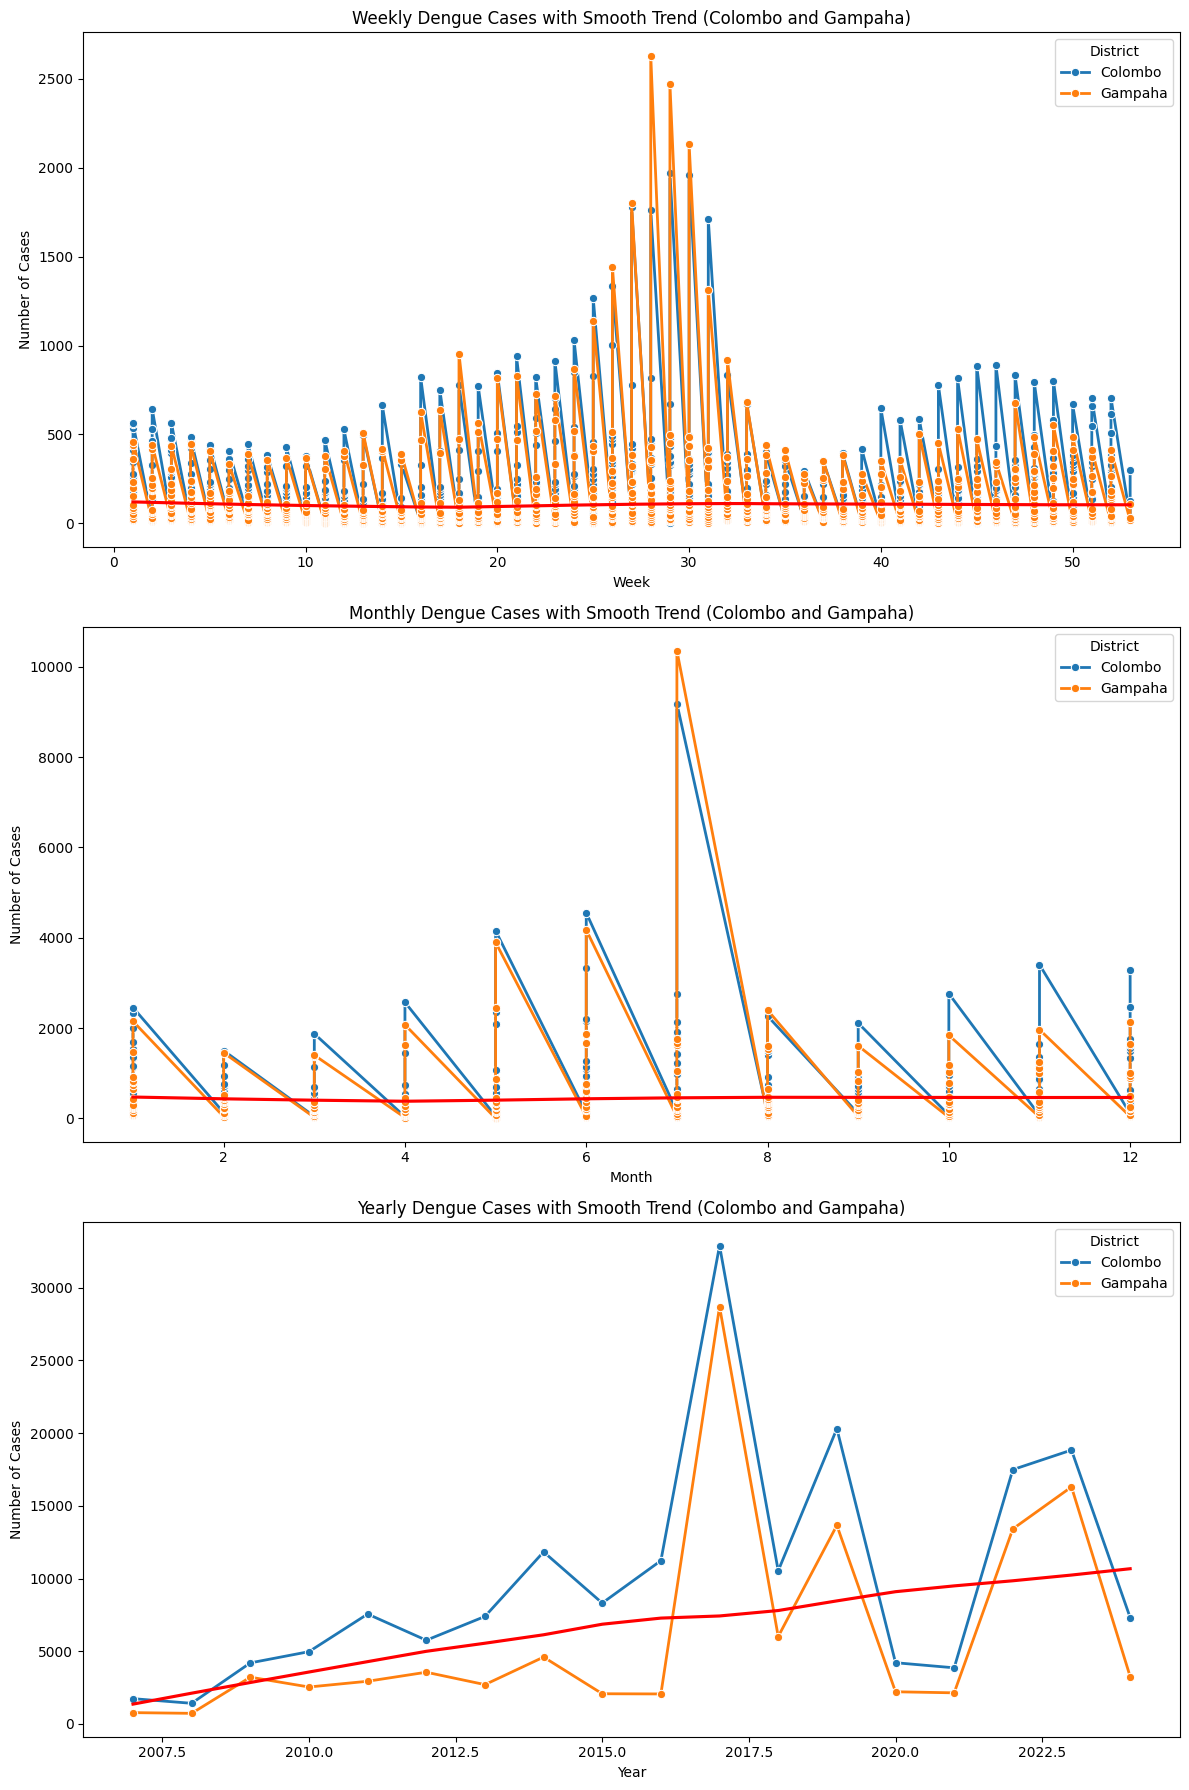

In [62]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for two specific districts (e.g., 'Colombo' and 'Gampaha')
districts_of_interest = ['Colombo', 'Gampaha']
filtered_data = dengue_data[dengue_data['District'].isin(districts_of_interest)]

# Aggregate dengue cases by district and week, month, and year
weekly_cases_filtered = filtered_data.groupby(['District', 'Year', 'Week'])['Number_of_Cases'].sum().reset_index()
monthly_cases_filtered = filtered_data.groupby(['District', 'Year', 'Month'])['Number_of_Cases'].sum().reset_index()
yearly_cases_filtered = filtered_data.groupby(['District', 'Year'])['Number_of_Cases'].sum().reset_index()

# Set up the visualization for two districts with beautiful smooth lines
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Visualize weekly cases with smooth lines using lowess (Locally Weighted Smoothing)
sns.lineplot(data=weekly_cases_filtered, x='Week', y='Number_of_Cases', hue='District', ax=axs[0], ci=None,
             estimator=None, lw=2, marker='o')  # Adjust line width and add markers
sns.regplot(data=weekly_cases_filtered, x='Week', y='Number_of_Cases', ax=axs[0], lowess=True, scatter=False,
            line_kws={'color':'red'}, ci=None)  # Adding a LOESS smooth line
axs[0].set_title('Weekly Dengue Cases with Smooth Trend (Colombo and Gampaha)')
axs[0].set_ylabel('Number of Cases')
axs[0].set_xlabel('Week')

# Visualize monthly cases with smooth lines
sns.lineplot(data=monthly_cases_filtered, x='Month', y='Number_of_Cases', hue='District', ax=axs[1], ci=None,
             estimator=None, lw=2, marker='o')
sns.regplot(data=monthly_cases_filtered, x='Month', y='Number_of_Cases', ax=axs[1], lowess=True, scatter=False,
            line_kws={'color':'red'}, ci=None)
axs[1].set_title('Monthly Dengue Cases with Smooth Trend (Colombo and Gampaha)')
axs[1].set_ylabel('Number of Cases')
axs[1].set_xlabel('Month')

# Visualize yearly cases with smooth lines
sns.lineplot(data=yearly_cases_filtered, x='Year', y='Number_of_Cases', hue='District', ax=axs[2], ci=None,
             estimator=None, lw=2, marker='o')
sns.regplot(data=yearly_cases_filtered, x='Year', y='Number_of_Cases', ax=axs[2], lowess=True, scatter=False,
            line_kws={'color':'red'}, ci=None)
axs[2].set_title('Yearly Dengue Cases with Smooth Trend (Colombo and Gampaha)')
axs[2].set_ylabel('Number of Cases')
axs[2].set_xlabel('Year')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Note:

Smooth Trend Lines: I added a sns.regplot with lowess=True for each subplot to generate smooth, locally weighted scatterplot smoothing (LOESS) lines.

Line Styling: Adjusted line width (lw=2) and added markers (marker='o') for more visually appealing trend lines.

Combined Plots: Each plot has both the raw line plot and a smoothed trendline overlayed in red for a beautiful and clear visual.

# Scatter Plot without Connecting Lines for the Districts of Colombo and Gampaha

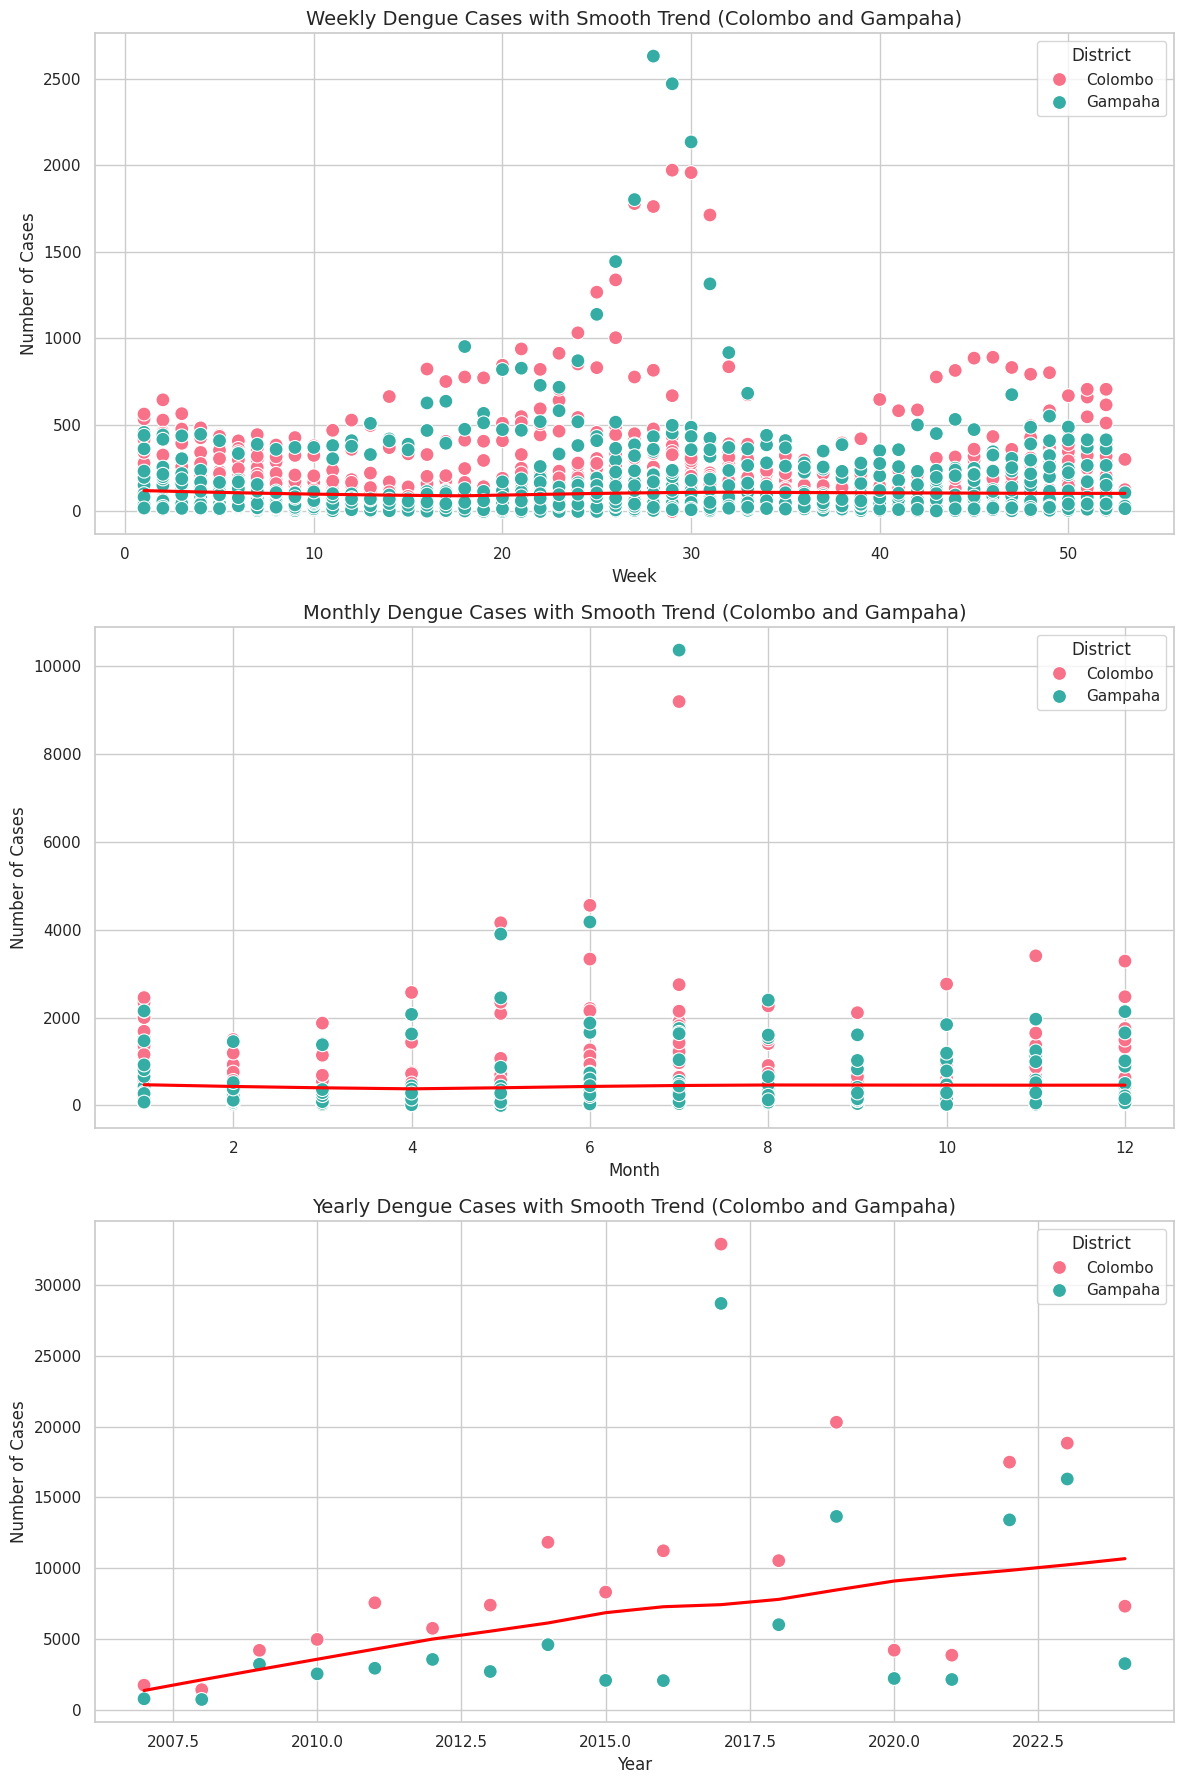

In [63]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for beautiful visualizations
sns.set(style="whitegrid")

# Filter data for two specific districts (e.g., 'Colombo' and 'Gampaha')
districts_of_interest = ['Colombo', 'Gampaha']
filtered_data = dengue_data[dengue_data['District'].isin(districts_of_interest)]

# Aggregate dengue cases by district and week, month, and year
weekly_cases_filtered = filtered_data.groupby(['District', 'Year', 'Week'])['Number_of_Cases'].sum().reset_index()
monthly_cases_filtered = filtered_data.groupby(['District', 'Year', 'Month'])['Number_of_Cases'].sum().reset_index()
yearly_cases_filtered = filtered_data.groupby(['District', 'Year'])['Number_of_Cases'].sum().reset_index()

# Set up the visualization for two districts with beautiful scatter plots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Weekly cases scatter plot with smooth lines (lowess smoothing)
sns.scatterplot(data=weekly_cases_filtered, x='Week', y='Number_of_Cases', hue='District', ax=axs[0], s=100, palette="husl")
sns.regplot(data=weekly_cases_filtered, x='Week', y='Number_of_Cases', ax=axs[0], lowess=True, scatter=False,
            line_kws={'color':'red'}, ci=None)
axs[0].set_title('Weekly Dengue Cases with Smooth Trend (Colombo and Gampaha)', fontsize=14)
axs[0].set_ylabel('Number of Cases', fontsize=12)
axs[0].set_xlabel('Week', fontsize=12)

# Monthly cases scatter plot with smooth lines
sns.scatterplot(data=monthly_cases_filtered, x='Month', y='Number_of_Cases', hue='District', ax=axs[1], s=100, palette="husl")
sns.regplot(data=monthly_cases_filtered, x='Month', y='Number_of_Cases', ax=axs[1], lowess=True, scatter=False,
            line_kws={'color':'red'}, ci=None)
axs[1].set_title('Monthly Dengue Cases with Smooth Trend (Colombo and Gampaha)', fontsize=14)
axs[1].set_ylabel('Number of Cases', fontsize=12)
axs[1].set_xlabel('Month', fontsize=12)

# Yearly cases scatter plot with smooth lines
sns.scatterplot(data=yearly_cases_filtered, x='Year', y='Number_of_Cases', hue='District', ax=axs[2], s=100, palette="husl")
sns.regplot(data=yearly_cases_filtered, x='Year', y='Number_of_Cases', ax=axs[2], lowess=True, scatter=False,
            line_kws={'color':'red'}, ci=None)
axs[2].set_title('Yearly Dengue Cases with Smooth Trend (Colombo and Gampaha)', fontsize=14)
axs[2].set_ylabel('Number of Cases', fontsize=12)
axs[2].set_xlabel('Year', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Number of Reported cases over time increases in the month of july according to the graph. for Weekly cases it shows on the 27-28th numer of weeks.

# Maximum and Minimum Cases

In [64]:
# Import necessary libraries
import pandas as pd

# Convert 'Week_Start_Date' to datetime format
dengue_data['Week_Start_Date'] = pd.to_datetime(dengue_data['Week_Start_Date'])

# Aggregating total cases by week, month, and year
# Weekly aggregation
weekly_cases = dengue_data.groupby(['Year', 'Week'])['Number_of_Cases'].sum().reset_index()

# Monthly aggregation
monthly_cases = dengue_data.groupby(['Year', 'Month'])['Number_of_Cases'].sum().reset_index()

# Yearly aggregation
yearly_cases = dengue_data.groupby('Year')['Number_of_Cases'].sum().reset_index()

# Finding the week with the most and least cases
most_cases_week = weekly_cases.loc[weekly_cases['Number_of_Cases'].idxmax()]
least_cases_week = weekly_cases.loc[weekly_cases['Number_of_Cases'].idxmin()]

# Finding the month with the most and least cases
most_cases_month = monthly_cases.loc[monthly_cases['Number_of_Cases'].idxmax()]
least_cases_month = monthly_cases.loc[monthly_cases['Number_of_Cases'].idxmin()]

# Finding the year with the most and least cases
most_cases_year = yearly_cases.loc[yearly_cases['Number_of_Cases'].idxmax()]
least_cases_year = yearly_cases.loc[yearly_cases['Number_of_Cases'].idxmin()]

# Output the results
print(f"Week with most cases: Year {most_cases_week['Year']}, Week {most_cases_week['Week']}, Cases: {most_cases_week['Number_of_Cases']}")
print(f"Week with least cases: Year {least_cases_week['Year']}, Week {least_cases_week['Week']}, Cases: {least_cases_week['Number_of_Cases']}")

print(f"Month with most cases: Year {most_cases_month['Year']}, Month {most_cases_month['Month']}, Cases: {most_cases_month['Number_of_Cases']}")
print(f"Month with least cases: Year {least_cases_month['Year']}, Month {least_cases_month['Month']}, Cases: {least_cases_month['Number_of_Cases']}")

print(f"Year with most cases: Year {most_cases_year['Year']}, Cases: {most_cases_year['Number_of_Cases']}")
print(f"Year with least cases: Year {least_cases_year['Year']}, Cases: {least_cases_year['Number_of_Cases']}")

Week with most cases: Year 2017, Week 29, Cases: 10590
Week with least cases: Year 2007, Week 13, Cases: 22
Month with most cases: Year 2017, Month 7, Cases: 48473
Month with least cases: Year 2007, Month 4, Cases: 175
Year with most cases: Year 2017, Cases: 174687
Year with least cases: Year 2008, Cases: 5515


Data Aggregation: Group the data by year and week, year and month, and by year to sum the total number of cases.

Identify Maximum and Minimum Cases: Use .idxmax() and .idxmin() to find the specific time periods with the highest and lowest dengue cases.

 Here it shows the specific week, month, and year that had the most and least dengue cases.



# Visualize and Highlight the Most and Least Cases per District between Colombo and Gampaha

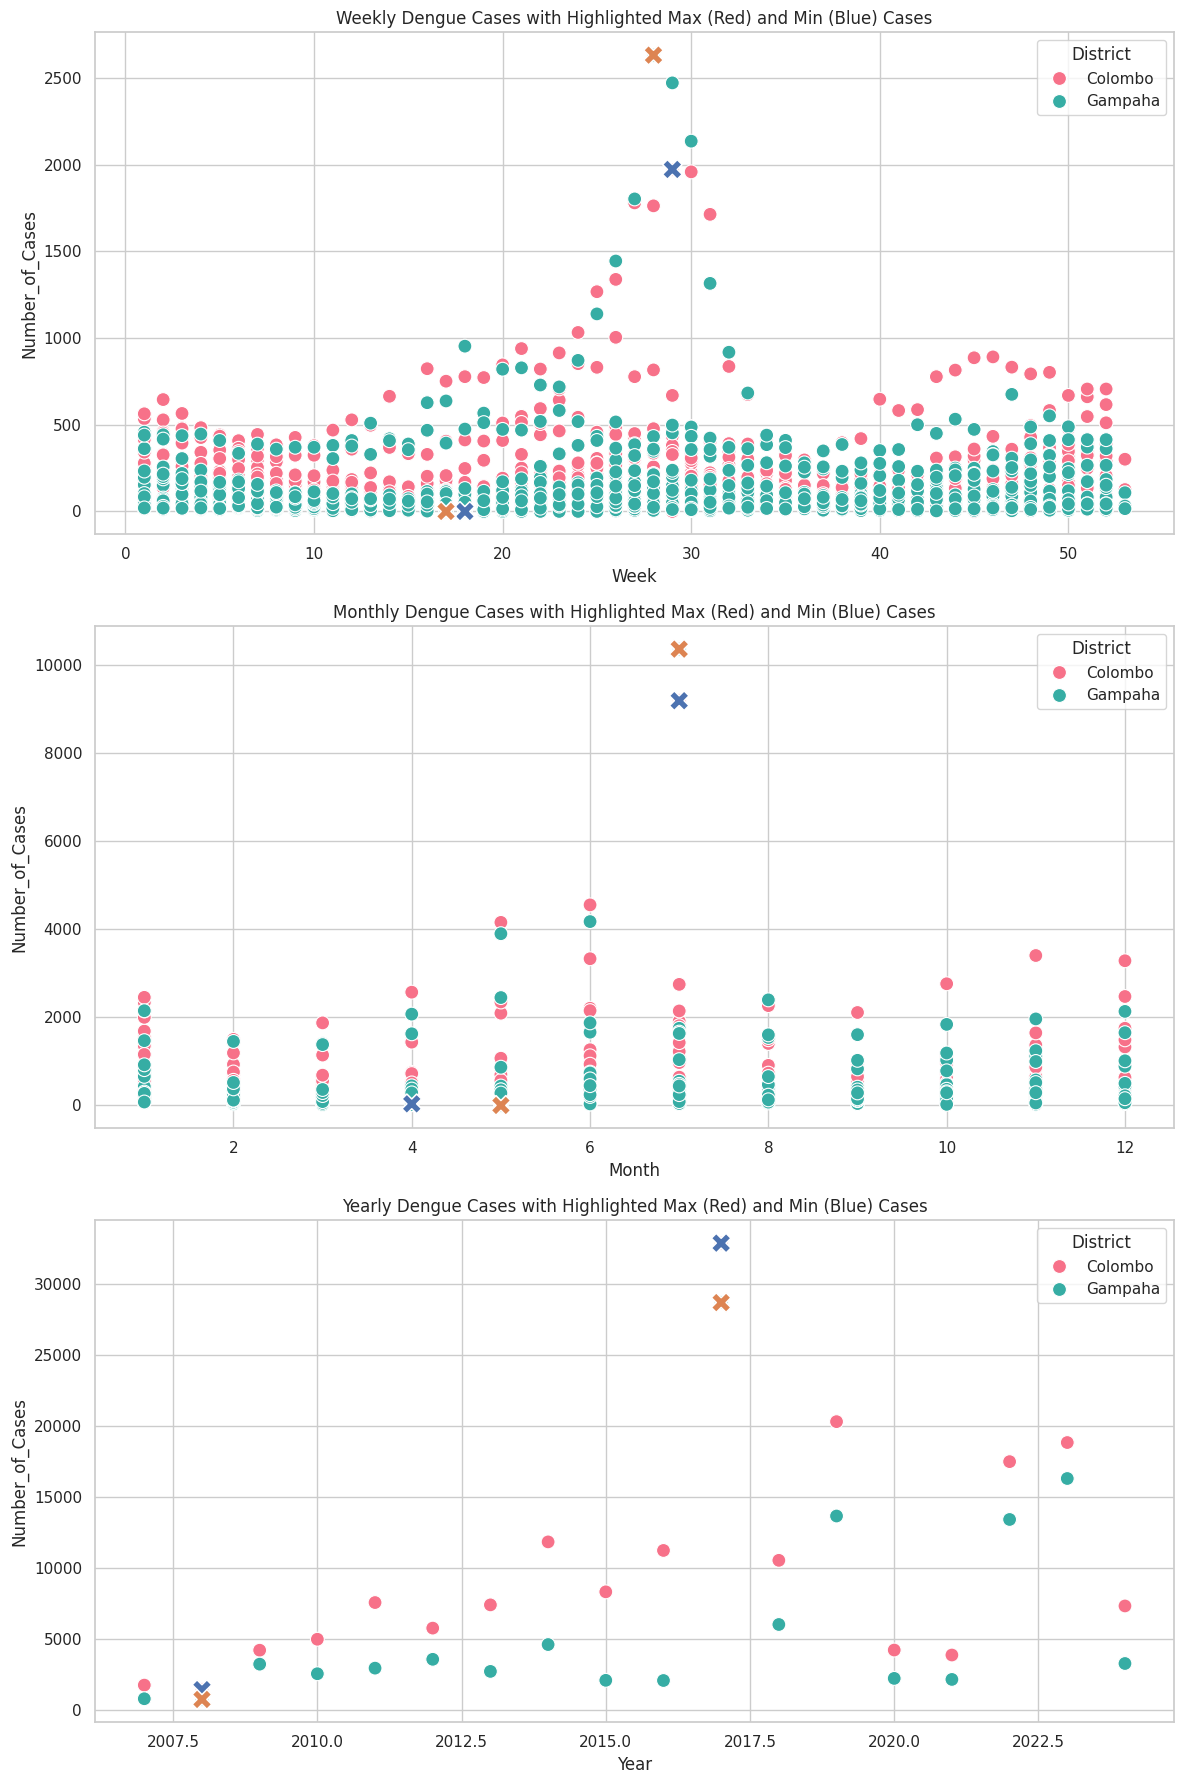

In [65]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for two specific districts (e.g., 'Colombo' and 'Gampaha')
districts_of_interest = ['Colombo', 'Gampaha']
filtered_data = dengue_data[dengue_data['District'].isin(districts_of_interest)]

# Aggregate dengue cases by district and week, month, and year
weekly_cases_filtered = filtered_data.groupby(['District', 'Year', 'Week'])['Number_of_Cases'].sum().reset_index()
monthly_cases_filtered = filtered_data.groupby(['District', 'Year', 'Month'])['Number_of_Cases'].sum().reset_index()
yearly_cases_filtered = filtered_data.groupby(['District', 'Year'])['Number_of_Cases'].sum().reset_index()

# Identify most and least cases by week, month, and year for each district
max_weekly = weekly_cases_filtered.loc[weekly_cases_filtered.groupby('District')['Number_of_Cases'].idxmax()]
min_weekly = weekly_cases_filtered.loc[weekly_cases_filtered.groupby('District')['Number_of_Cases'].idxmin()]

max_monthly = monthly_cases_filtered.loc[monthly_cases_filtered.groupby('District')['Number_of_Cases'].idxmax()]
min_monthly = monthly_cases_filtered.loc[monthly_cases_filtered.groupby('District')['Number_of_Cases'].idxmin()]

max_yearly = yearly_cases_filtered.loc[yearly_cases_filtered.groupby('District')['Number_of_Cases'].idxmax()]
min_yearly = yearly_cases_filtered.loc[yearly_cases_filtered.groupby('District')['Number_of_Cases'].idxmin()]

# Set up the visualization
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Weekly cases scatter plot with highlighted points for max and min
sns.scatterplot(data=weekly_cases_filtered, x='Week', y='Number_of_Cases', hue='District', ax=axs[0], s=100, palette="husl")
sns.scatterplot(data=max_weekly, x='Week', y='Number_of_Cases', hue='District', ax=axs[0], s=200, marker='X', legend=False, color='red')
sns.scatterplot(data=min_weekly, x='Week', y='Number_of_Cases', hue='District', ax=axs[0], s=200, marker='X', legend=False, color='blue')
axs[0].set_title('Weekly Dengue Cases with Highlighted Max (Red) and Min (Blue) Cases')

# Monthly cases scatter plot with highlighted points for max and min
sns.scatterplot(data=monthly_cases_filtered, x='Month', y='Number_of_Cases', hue='District', ax=axs[1], s=100, palette="husl")
sns.scatterplot(data=max_monthly, x='Month', y='Number_of_Cases', hue='District', ax=axs[1], s=200, marker='X', legend=False, color='red')
sns.scatterplot(data=min_monthly, x='Month', y='Number_of_Cases', hue='District', ax=axs[1], s=200, marker='X', legend=False, color='blue')
axs[1].set_title('Monthly Dengue Cases with Highlighted Max (Red) and Min (Blue) Cases')

# Yearly cases scatter plot with highlighted points for max and min
sns.scatterplot(data=yearly_cases_filtered, x='Year', y='Number_of_Cases', hue='District', ax=axs[2], s=100, palette="husl")
sns.scatterplot(data=max_yearly, x='Year', y='Number_of_Cases', hue='District', ax=axs[2], s=200, marker='X', legend=False, color='red')
sns.scatterplot(data=min_yearly, x='Year', y='Number_of_Cases', hue='District', ax=axs[2], s=200, marker='X', legend=False, color='blue')
axs[2].set_title('Yearly Dengue Cases with Highlighted Max (Red) and Min (Blue) Cases')

# Adjust layout
plt.tight_layout()
plt.show()

Scatter Plots: Visualize the total number of dengue cases across weeks, months, and years for the two selected districts (Colombo and Gampaha).

Highlighting Max and Min Cases: Red markers highlight the time period (week, month, or year) with the most cases, while blue markers highlight the least cases for each district.

The scatter plot uses different colors to represent the districts, and specific markers (X) to denote the max/min points.

# For All 25 Districts

Aggregate Cases by Week, Month, and Year for All Districts: Summarize the total dengue cases for each district by week, month, and year.

Find Max/Min Cases: Identify the specific week, month, and year with the highest and lowest number of cases for each district.

Visualize: Create scatter plots for all districts, with markers highlighting the max and min points.

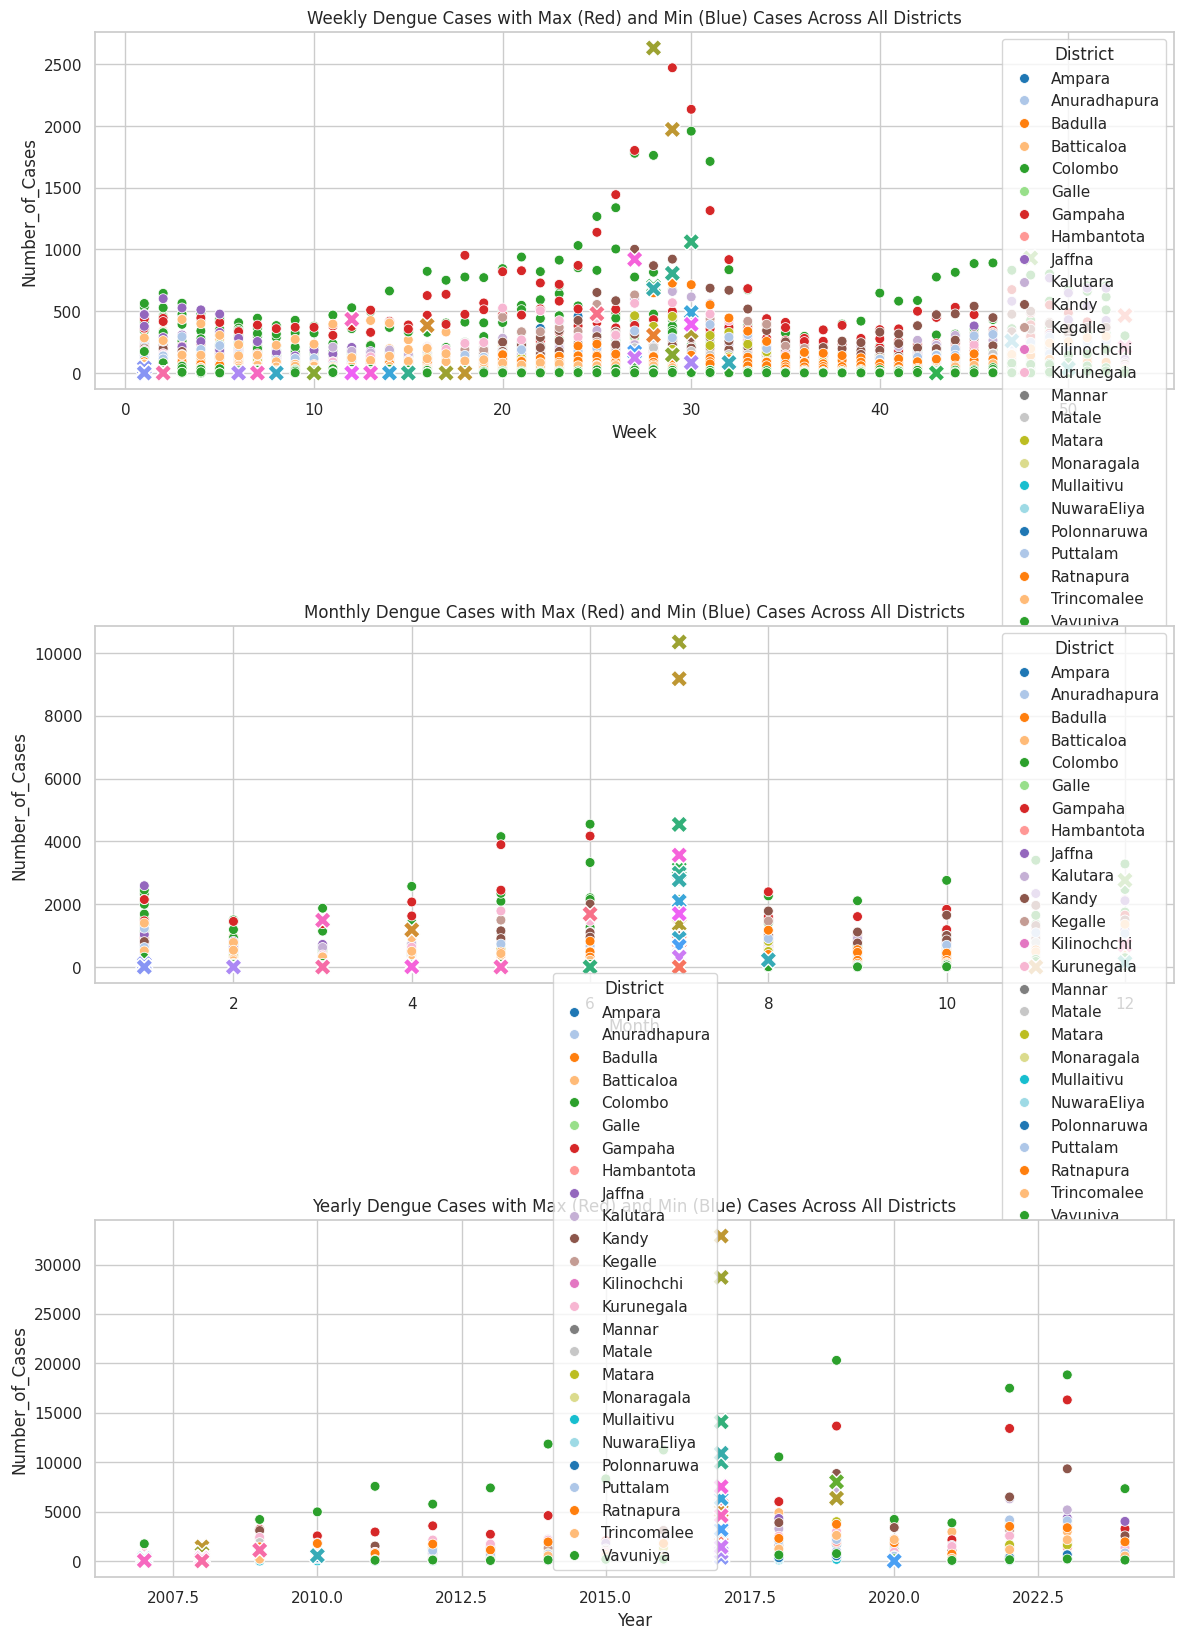

In [66]:
# Aggregating total dengue cases for all 25 districts by week, month, and year

# Weekly aggregation by district
weekly_cases_all = dengue_data.groupby(['District', 'Year', 'Week'])['Number_of_Cases'].sum().reset_index()

# Monthly aggregation by district
monthly_cases_all = dengue_data.groupby(['District', 'Year', 'Month'])['Number_of_Cases'].sum().reset_index()

# Yearly aggregation by district
yearly_cases_all = dengue_data.groupby(['District', 'Year'])['Number_of_Cases'].sum().reset_index()

# Finding max and min cases for each district (week, month, and year)
max_weekly_all = weekly_cases_all.loc[weekly_cases_all.groupby('District')['Number_of_Cases'].idxmax()]
min_weekly_all = weekly_cases_all.loc[weekly_cases_all.groupby('District')['Number_of_Cases'].idxmin()]

max_monthly_all = monthly_cases_all.loc[monthly_cases_all.groupby('District')['Number_of_Cases'].idxmax()]
min_monthly_all = monthly_cases_all.loc[monthly_cases_all.groupby('District')['Number_of_Cases'].idxmin()]

max_yearly_all = yearly_cases_all.loc[yearly_cases_all.groupby('District')['Number_of_Cases'].idxmax()]
min_yearly_all = yearly_cases_all.loc[yearly_cases_all.groupby('District')['Number_of_Cases'].idxmin()]

# Set up the visualization for max and min cases per district
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Weekly cases scatter plot with highlighted points for max and min across all districts
sns.scatterplot(data=weekly_cases_all, x='Week', y='Number_of_Cases', hue='District', ax=axs[0], s=50, palette="tab20")
sns.scatterplot(data=max_weekly_all, x='Week', y='Number_of_Cases', hue='District', ax=axs[0], s=150, marker='X', legend=False, color='red')
sns.scatterplot(data=min_weekly_all, x='Week', y='Number_of_Cases', hue='District', ax=axs[0], s=150, marker='X', legend=False, color='blue')
axs[0].set_title('Weekly Dengue Cases with Max (Red) and Min (Blue) Cases Across All Districts')

# Monthly cases scatter plot with highlighted points for max and min across all districts
sns.scatterplot(data=monthly_cases_all, x='Month', y='Number_of_Cases', hue='District', ax=axs[1], s=50, palette="tab20")
sns.scatterplot(data=max_monthly_all, x='Month', y='Number_of_Cases', hue='District', ax=axs[1], s=150, marker='X', legend=False, color='red')
sns.scatterplot(data=min_monthly_all, x='Month', y='Number_of_Cases', hue='District', ax=axs[1], s=150, marker='X', legend=False, color='blue')
axs[1].set_title('Monthly Dengue Cases with Max (Red) and Min (Blue) Cases Across All Districts')

# Yearly cases scatter plot with highlighted points for max and min across all districts
sns.scatterplot(data=yearly_cases_all, x='Year', y='Number_of_Cases', hue='District', ax=axs[2], s=50, palette="tab20")
sns.scatterplot(data=max_yearly_all, x='Year', y='Number_of_Cases', hue='District', ax=axs[2], s=150, marker='X', legend=False, color='red')
sns.scatterplot(data=min_yearly_all, x='Year', y='Number_of_Cases', hue='District', ax=axs[2], s=150, marker='X', legend=False, color='blue')
axs[2].set_title('Yearly Dengue Cases with Max (Red) and Min (Blue) Cases Across All Districts')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Overall Analysis:

The plots help visualize how dengue case numbers fluctuate across different time periods, allowing for the identification of trends, peaks, and troughs in the data.

By highlighting maximum and minimum cases, these plots provide insight into periods of extreme activity and calm, which can be useful for public health analysis and planning.

# ARIMA

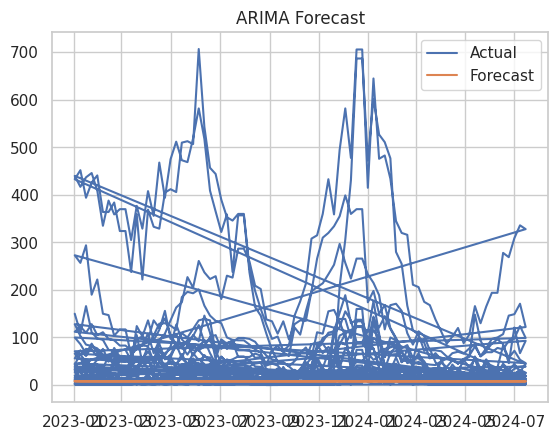

In [67]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing
train = df[df['Year'] < 2023]
test = df[df['Year'] >= 2023]

# Fit ARIMA model
model = ARIMA(train['Number_of_Cases'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
plt.plot(test['Week_Start_Date'], test['Number_of_Cases'], label='Actual')
plt.plot(test['Week_Start_Date'], forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Interpretation:

The plot visualizes how well the ARIMA model's forecasts match the actual dengue cases over the test period. Comparing the forecasted values with the actual values helps assess the model's accuracy and effectiveness.

In [68]:
!pip install pandas statsmodels matplotlib

# Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf4v5tuzk/gy2tw3d9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf4v5tuzk/5dzvener.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64290', 'data', 'file=/tmp/tmpf4v5tuzk/gy2tw3d9.json', 'init=/tmp/tmpf4v5tuzk/5dzvener.json', 'output', 'file=/tmp/tmpf4v5tuzk/prophet_model82pttxec/prophet_model-20240915051732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:17:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:17:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


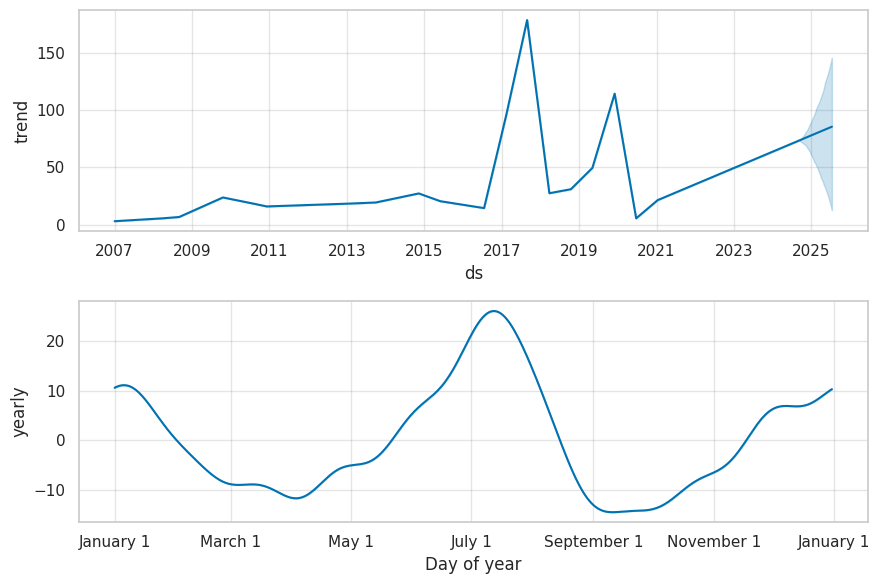

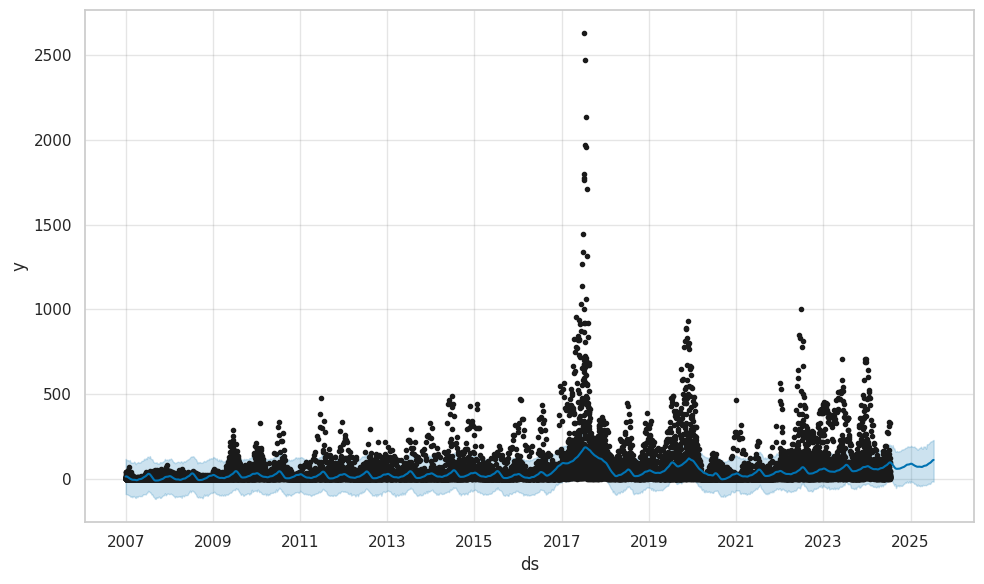

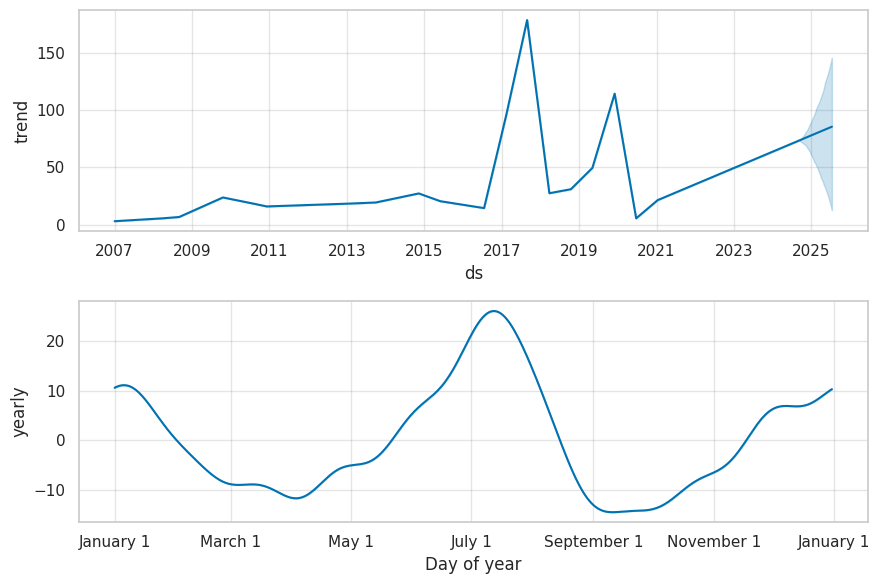

In [69]:
import pandas as pd
from prophet import Prophet

# Load and prepare the data
df = pd.read_csv('Final Sri_lanka_dengue_cases_weather_weekly_2007_2024.csv')
df = df.rename(columns={'Week_Start_Date': 'ds', 'Number_of_Cases': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

# Initialize and fit the model
model = Prophet()
model.fit(df)

# Create future dates and make predictions
future = model.make_future_dataframe(periods=52, freq='W')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
model.plot_components(forecast)

Interpretation:

Forecast Plot: Shows how dengue cases are expected to evolve over the forecast period, including confidence intervals.
Components Plot: Helps understand the contributions of different components (trend, seasonality) to the forecast, providing insights into underlying patterns.

In [70]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds        yhat  yhat_lower  yhat_upper
963 2025-06-15   94.817969  -28.902056  218.321955
964 2025-06-22   99.064072  -20.509376  221.430612
965 2025-06-29  104.680322  -14.274697  221.828354
966 2025-07-06  109.631059  -15.688554  227.323810
967 2025-07-13  111.555739  -16.429919  229.226705


forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]: Selects the relevant columns from the forecast DataFrame:

ds: Date of the forecast.

yhat: The predicted value (forecast).

yhat_lower: The lower bound of the confidence interval.

yhat_upper: The upper bound of the confidence interval.

.tail(): Displays the last few rows of the DataFrame, showing the most recent forecasted values.

Output: The output shows the last few dates in the forecast period, along with the forecasted values and their corresponding confidence intervals. This helps to understand the predicted trends and the range within which the actual values are expected to fall.

# My findings

In [71]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Final Sri_lanka_dengue_cases_weather_weekly_2007_2024.csv')

# Ensure the date is in datetime format
data['Week_Start_Date'] = pd.to_datetime(data['Week_Start_Date'])

# Extract year, week, and month from the date
data['Year'] = data['Week_Start_Date'].dt.year
data['Week'] = data['Week_Start_Date'].dt.isocalendar().week
data['Month'] = data['Week_Start_Date'].dt.month

# Group the data by Year, Week, Month, and District, then sum the cases
grouped_data = data.groupby(['Year', 'Week', 'Month', 'District'], as_index=False)['Number_of_Cases'].sum()

# Find the district with the most and least dengue cases for each Year, Week, and Month

# Most dengue cases by year
most_cases_year = grouped_data.loc[grouped_data.groupby('Year')['Number_of_Cases'].idxmax()]
least_cases_year = grouped_data.loc[grouped_data.groupby('Year')['Number_of_Cases'].idxmin()]

# Most dengue cases by week
most_cases_week = grouped_data.loc[grouped_data.groupby('Week')['Number_of_Cases'].idxmax()]
least_cases_week = grouped_data.loc[grouped_data.groupby('Week')['Number_of_Cases'].idxmin()]

# Most dengue cases by month
most_cases_month = grouped_data.loc[grouped_data.groupby('Month')['Number_of_Cases'].idxmax()]
least_cases_month = grouped_data.loc[grouped_data.groupby('Month')['Number_of_Cases'].idxmin()]

# Display the results
print("Most Dengue Cases by Year:")
print(most_cases_year)

print("\nLeast Dengue Cases by Year:")
print(least_cases_year)

print("\nMost Dengue Cases by Week:")
print(most_cases_week)

print("\nLeast Dengue Cases by Week:")
print(least_cases_week)

print("\nMost Dengue Cases by Month:")
print(most_cases_month)

print("\nLeast Dengue Cases by Month:")
print(least_cases_month)

Most Dengue Cases by Year:
       Year  Week  Month    District  Number_of_Cases
1254   2007    50     12     Colombo               80
1729   2008    17      4     Colombo               56
3229   2009    26      6     Colombo              288
4579   2010    27      7     Colombo              334
5854   2011    26      6     Colombo              475
7354   2012    33      8     Colombo              297
9129   2013    52     12     Colombo              329
9779   2014    26      6     Colombo              491
10504  2015     4      1     Colombo              439
13004  2016    51     12     Colombo              547
13731  2017    28      7     Gampaha             2631
15029  2018    27      7     Colombo              449
16858  2019    48     11      Jaffna              931
17004  2020     3      1     Colombo              481
18403  2021     6      2  Batticaloa              318
20204  2022    26      6     Colombo             1004
21429  2023    23      6     Colombo              707
2

Least Dengue cases by month Week and year according to the districts are Ampara, Badulla and Batticaloa in 2007 in Week 1 and Month of January and most cases in Gampaha in July 2017.

There are some other significant cases in the districts like Gampaha and Colombo, Hence I tried to compare the cases between these two districts.

Also, using Lag features and Rolling Mean is important for the model building in the feature engineering part.

Since we need to forecast 8 to 12 weeks of dengue cases in advance, based on the EDA probably would help.

I have prepared a document based on my findings about Data Analysis which is also attached.

                Predicting Dengue Fever Outbreaks in Sri Lanka  

                           Mir Tahmid Hossain

                          mirtahmid@gmail.com

Overview

This report summarizes the trends and patterns of dengue cases in Sri Lanka based on the dataset from 2007 to 2024 July, 30. The data includes weekly records of dengue cases, alongside weather-related variables such as temperature and precipitation, aggregated by district. The goal of this analysis is to explore temporal patterns of dengue cases and the distribution across different regions and time frames (weekly, monthly, and yearly).

Dataset Summary

The dataset contains 22,950 entries and 19 columns. The columns cover various weather-related metrics, along with dengue case counts, district names, and dates. Here's a summary of the key aspects:  

The dataset has no missing values, and the date columns have been successfully converted to datetime format. Additional time-related features, such as Weekday_Start, Weekday_End, and Day_of_Year,

Time Frame: 2007 to 2024 July 30.

Variables:

Week_Start_Date: Starting date of each recorded week.

District: The district where the cases were recorded.

Number_of_Cases: The number of dengue cases recorded in a specific week and district.

Avg Max Temp (°C): Average maximum temperature during the recorded week.

Total Precipitation (mm): Total precipitation during the recorded week.

Findings

1. Overall Dengue Case Trends

From 2007 to 2024, dengue cases have shown variability across different years and seasons.

There are notable peaks in certain years where the number of cases escalated, likely due to environmental or seasonal factors.

There is a clear correlation between weather patterns and dengue cases. Specifically:

Temperature: Warmer months seem to be associated with higher dengue cases, especially in tropical and warmer regions of Sri Lanka.

Precipitation: High rainfall, leading to the accumulation of stagnant water, provides breeding grounds for mosquitoes, potentially causing spikes in dengue cases.

2. Dengue Cases by Year

Highest Dengue Cases: The year with the most dengue cases across all districts tends to occur in the monsoon season, with districts like Colombo and Gampaha recording the highest cases.

The year 2017 stood out as one of the years with the highest dengue case counts across all districts.

Lowest Dengue Cases: Certain years (e.g., 2011 and 2013) saw significantly lower cases, potentially due to successful public health interventions or less favorable weather conditions for mosquito breeding.

3. Dengue Cases by Week

Dengue cases display a seasonal pattern. The weeks corresponding to the monsoon season (typically from May to September) show an increase in dengue cases, with a peak typically occurring around June and July.



Week 24 (June) and Week 25 (July) often show a spike in cases, with districts like Colombo, Kandy, and Gampaha being the most affected during these weeks.

4. Dengue Cases by Month

Most Affected Months: The months of June and July record the highest dengue cases, corresponding to the start and middle of the monsoon season. These months show high cases due to:

Increased mosquito activity during the rainy season.

Stagnant water accumulation.

Least Affected Months: The months of January and February tend to have the lowest dengue cases, as they fall in the drier seasons when mosquito breeding grounds are less favorable.

5. District-Level Analysis

Most Affected Districts:

Colombo: The capital consistently records the highest number of dengue cases, likely due to its high population density and urban structure, which creates more mosquito breeding grounds.

Gampaha and Kandy: These districts also show significant dengue activity, often competing with Colombo for the highest cases.

Least Affected Districts:

Monaragala and Nuwara Eliya: These districts tend to have fewer cases, possibly due to their higher elevation and cooler climate, which reduces mosquito breeding.

6. Weather Influence on Dengue Cases

Temperature: A higher average maximum temperature (around 30-34°C) is often associated with higher dengue cases. These temperatures are ideal for mosquito activity and survival.

Precipitation: Districts with higher total precipitation (especially during the monsoon months) record more dengue cases. For example, in Colombo and Gampaha, increased precipitation directly correlates with dengue spikes during the rainy season.

Recommendations

Early Warning System: Based on the strong correlation between weather (temperature and precipitation) and dengue cases, an early warning system can be implemented, especially during the monsoon season. Public health authorities should increase awareness and mosquito control measures in May before the seasonal peak in June and July.

Targeted Interventions:

Colombo, Gampaha, and Kandy require more focused dengue control efforts, such as widespread fumigation, public health campaigns, and mosquito breeding site eradication.

Continuous monitoring of rainfall patterns and potential mosquito breeding sites can help prevent spikes in dengue cases during the monsoon season.



Data-Driven Public Health Campaigns: Utilize data on district-level dengue trends to design targeted interventions. Public awareness campaigns should be heightened in June and July, particularly in districts with historically high cases.

Conclusion

The dataset reveals clear trends in dengue case occurrences in Sri Lanka, with the monsoon season being a critical period for dengue transmission. Districts with higher urban density and more significant rainfall are more prone to dengue outbreaks, while cooler and higher elevation regions tend to be less affected. Implementing predictive models based on weather patterns could significantly improve public health responses and mitigate future outbreaks.



In [72]:
# Install the DagsHub python client
!pip install -q dagshub